# **SMART LENDING ALLY**
# **Multi-Bank Loan Recommendation System for Research Paper**
## A complete implementation with synthetic data generation, model training, novel algorithms, and visualization

### Importing all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import random
from datetime import datetime, timedelta
import shap
import warnings
warnings.filterwarnings('ignore')

### Set random seed for reproducibility

In [ ]:
np.random.seed(42)
random.seed(42)

### 1. Data Generation

In [ ]:
def generate_indian_name():
    """Generate a random Indian name"""
    first_names = [
        "Aarav", "Vivaan", "Aditya", "Vihaan", "Arjun", "Reyansh", "Ayaan", "Atharva",
        "Krishna", "Ishaan", "Shaurya", "Advik", "Rudra", "Advaith", "Kabir", "Aryan",
        "Dhruv", "Raghav", "Shrihaan", "Arnav", "Anik", "Shivay", "Hrithik", "Rohan",
        "Aanya", "Aadhya", "Saanvi", "Aaradhya", "Ananya", "Pari", "Myra", "Sara",
        "Siya", "Prisha", "Riya", "Diya", "Divya", "Amaira", "Kiara", "Krisha",
        "Avni", "Anvi", "Aisha", "Vanya", "Navya", "Nisha", "Angel", "Ahana"
    ]

    last_names = [
        "Sharma", "Verma", "Patel", "Gupta", "Singh", "Kumar", "Kaur", "Joshi",
        "Shah", "Mehta", "Choudhary", "Patil", "Desai", "Agarwal", "Rao", "Reddy",
        "Chopra", "Nair", "Menon", "Das", "Mukherjee", "Banerjee", "Chatterjee", "Iyer",
        "Iyengar", "Varma", "Shukla", "Nayar", "Pillai", "Kapoor", "Malhotra", "Bajwa"
    ]

    return f"{random.choice(first_names)} {random.choice(last_names)}"

def generate_indian_mobile():
    """Generate a realistic Indian mobile number"""
    prefixes = ["6", "7", "8", "9"]
    return f"+91 {random.choice(prefixes)}{random.randint(1, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}{random.randint(0, 9):01d}"

def generate_indian_address():
    """Generate a random Indian address"""
    house_numbers = [f"{random.randint(1, 999)}", f"{random.randint(1, 999)}/{random.randint(1, 50)}"]
    street_names = ["MG Road", "Gandhi Road", "Nehru Street", "Patel Marg", "Tilak Road", "Shastri Nagar",
                  "Ambedkar Colony", "Subhash Chowk", "Tagore Lane", "Sardar Patel Road", "Azad Marg"]
    areas = ["Andheri", "Bandra", "Juhu", "Dadar", "Worli", "Malad", "Powai", "Vikhroli", "Thane", "Borivali",
           "Goregaon", "Vasant Kunj", "Dwarka", "Rohini", "Saket", "Lajpat Nagar", "Karol Bagh", "Adyar",
           "T Nagar", "Mylapore", "Velachery", "Anna Nagar", "Whitefield", "Indiranagar", "Koramangala",
           "Jayanagar", "Malleshwaram", "JP Nagar", "Aundh", "Kothrud", "Deccan", "Viman Nagar", "Hinjewadi"]
    cities = ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune", "Ahmedabad",
            "Jaipur", "Lucknow", "Chandigarh", "Indore", "Bhopal", "Nagpur", "Surat", "Vadodara"]
    states = ["Maharashtra", "Delhi", "Karnataka", "Tamil Nadu", "West Bengal", "Telangana", "Maharashtra",
            "Gujarat", "Rajasthan", "Uttar Pradesh", "Punjab", "Madhya Pradesh", "Madhya Pradesh", "Maharashtra", "Gujarat", "Gujarat"]

    city_idx = random.randint(0, len(cities)-1)

    return f"{random.choice(house_numbers)}, {random.choice(street_names)}, {random.choice(areas)}, {cities[city_idx]}, {states[city_idx]}"

def generate_pan_number():
    """Generate a realistic PAN number"""
    # Format: AAAAA1234A
    first_part = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=5))
    middle_part = ''.join(random.choices('0123456789', k=4))
    last_part = random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    return f"{first_part}{middle_part}{last_part}"

def generate_aadhaar_number():
    """Generate a realistic Aadhaar number"""
    # Format: 1234-5678-9012
    part1 = ''.join(random.choices('0123456789', k=4))
    part2 = ''.join(random.choices('0123456789', k=4))
    part3 = ''.join(random.choices('0123456789', k=4))
    return f"{part1}-{part2}-{part3}"

def calculate_cibil_score(income, age, existing_loans, loan_defaults, credit_history_years):
    """Calculate a realistic CIBIL score based on factors"""
    base_score = 600

    # Income factor (higher income, better score)
    income_factor = min(150, max(0, (income / 50000) * 30))

    # Age factor (middle age gets best scores)
    if 30 <= age <= 50:
        age_factor = 50
    else:
        age_factor = max(0, 50 - abs(age - 40) * 2)

    # Existing loans factor (fewer loans, better score)
    loans_factor = max(-100, -existing_loans * 30)

    # Defaults factor (major negative impact)
    defaults_factor = max(-300, -loan_defaults * 100)

    # Credit history length (longer history, better score)
    history_factor = min(100, credit_history_years * 10)

    # Calculate final score with some randomness
    score = base_score + income_factor + age_factor + loans_factor + defaults_factor + history_factor
    score = score + random.randint(-20, 20)  # Add some noise

    # Clamp between 300 and 900
    return max(300, min(900, int(score)))

def calculate_loan_eligibility(bank_name, loan_type, user_data):
    """Determine if a user is eligible for a specific loan from a specific bank"""
    # Extract user data
    age = user_data['age']
    monthly_income = user_data['monthly_income']
    occupation = user_data['occupation']
    cibil_score = user_data['cibil_score']
    employment_years = user_data['employment_years']
    existing_loans = user_data['existing_loans']
    loan_amount = user_data['loan_amount_requested']

    # Bank-specific eligibility criteria
    eligibility = False

    # Calculate debt-to-income ratio
    dti_ratio = (user_data['current_emi'] / monthly_income) if monthly_income > 0 else 1

    # SBI criteria
    if bank_name == 'State Bank of India':
        min_cibil = 650 if loan_type == 'Home' else (620 if loan_type == 'Car' else 600)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 25000 if loan_type == 'Home' else (20000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # HDFC criteria
    elif bank_name == 'HDFC Bank':
        min_cibil = 680 if loan_type == 'Home' else (650 if loan_type == 'Car' else 630)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 30000 if loan_type == 'Home' else (25000 if loan_type == 'Car' else 20000)
        min_employment = 1.5 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 23 and age <= 70)

    # ICICI criteria
    elif bank_name == 'ICICI Bank':
        min_cibil = 670 if loan_type == 'Home' else (640 if loan_type == 'Car' else 620)
        max_dti = 0.6 if loan_type == 'Home' else (0.5 if loan_type == 'Car' else 0.4)
        min_income = 28000 if loan_type == 'Home' else (22000 if loan_type == 'Car' else 18000)
        min_employment = 1.8 if loan_type == 'Home' else (1.2 if loan_type == 'Car' else 0.8)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 22 and age <= 68)

    # Axis criteria
    elif bank_name == 'Axis Bank':
        min_cibil = 660 if loan_type == 'Home' else (630 if loan_type == 'Car' else 610)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 27000 if loan_type == 'Home' else (21000 if loan_type == 'Car' else 16000)
        min_employment = 1.7 if loan_type == 'Home' else (1.1 if loan_type == 'Car' else 0.6)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # PNB criteria
    elif bank_name == 'Punjab National Bank':
        min_cibil = 630 if loan_type == 'Home' else (600 if loan_type == 'Car' else 580)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 22000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 63)

    # Canara criteria
    elif bank_name == 'Canara Bank':
        min_cibil = 620 if loan_type == 'Home' else (590 if loan_type == 'Car' else 570)
        max_dti = 0.45 if loan_type == 'Home' else (0.35 if loan_type == 'Car' else 0.3)
        min_income = 20000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # Bank of Baroda criteria
    elif bank_name == 'Bank of Baroda':
        min_cibil = 625 if loan_type == 'Home' else (595 if loan_type == 'Car' else 575)
        max_dti = 0.48 if loan_type == 'Home' else (0.38 if loan_type == 'Car' else 0.32)
        min_income = 21000 if loan_type == 'Home' else (19000 if loan_type == 'Car' else 16000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # Kotak criteria
    elif bank_name == 'Kotak Mahindra Bank':
        min_cibil = 675 if loan_type == 'Home' else (645 if loan_type == 'Car' else 625)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 30000 if loan_type == 'Home' else (25000 if loan_type == 'Car' else 20000)
        min_employment = 1.5 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # Union Bank criteria
    elif bank_name == 'Union Bank of India':
        min_cibil = 610 if loan_type == 'Home' else (590 if loan_type == 'Car' else 570)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 20000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65)

    # IndusInd criteria
    elif bank_name == 'IndusInd Bank':
        min_cibil = 670 if loan_type == 'Home' else (640 if loan_type == 'Car' else 620)
        max_dti = 0.6 if loan_type == 'Home' else (0.5 if loan_type == 'Car' else 0.4)
        min_income = 35000 if loan_type == 'Home' else (30000 if loan_type == 'Car' else 25000)
        min_employment = 1 if loan_type == 'Home' else (0.8 if loan_type == 'Car' else 0.5)

        eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 23 and age <= 65)

    return eligibility

def generate_interest_rate(bank_name, loan_type, user_data):
    """Generate a realistic interest rate based on bank, loan type, and user profile"""
    cibil_score = user_data['cibil_score']

    # Base rates by loan type
    if loan_type == 'Home':
        base_rate = 8.5
    elif loan_type == 'Car':
        base_rate = 9.5
    elif loan_type == 'Education':
        base_rate = 10.0
    elif loan_type == 'Personal':
        base_rate = 12.0
    else:  # Gold
        base_rate = 11.0

    # Bank adjustment
    bank_adjustments = {
        'State Bank of India': -0.2,
        'HDFC Bank': 0.1,
        'ICICI Bank': 0.0,
        'Axis Bank': 0.05,
        'Punjab National Bank': -0.3,
        'Canara Bank': -0.25,
        'Bank of Baroda': -0.2,
        'Kotak Mahindra Bank': 0.15,
        'Union Bank of India': -0.3,
        'IndusInd Bank': 0.2
    }

    # CIBIL score adjustment
    if cibil_score >= 800:
        cibil_adjustment = -0.5
    elif cibil_score >= 750:
        cibil_adjustment = -0.3
    elif cibil_score >= 700:
        cibil_adjustment = -0.1
    elif cibil_score >= 650:
        cibil_adjustment = 0.0
    elif cibil_score >= 600:
        cibil_adjustment = 0.2
    else:
        cibil_adjustment = 0.5

    # Calculate final rate with some randomness
    final_rate = base_rate + bank_adjustments.get(bank_name, 0) + cibil_adjustment
    final_rate += random.uniform(-0.1, 0.1)  # Add small random adjustment

    return round(final_rate, 2)

def generate_processing_time(bank_name, loan_type):
    """Generate estimated processing time in days for a loan"""
    # Base processing time by loan type
    if loan_type == 'Home':
        base_time = 15
    elif loan_type == 'Car':
        base_time = 7
    elif loan_type == 'Education':
        base_time = 10
    elif loan_type == 'Personal':
        base_time = 5
    else:  # Gold
        base_time = 3

    # Bank efficiency adjustments (days)
    bank_adjustments = {
        'State Bank of India': 2,
        'HDFC Bank': -2,
        'ICICI Bank': -1,
        'Axis Bank': -1.5,
        'Punjab National Bank': 3,
        'Canara Bank': 2.5,
        'Bank of Baroda': 2,
        'Kotak Mahindra Bank': -2,
        'Union Bank of India': 3,
        'IndusInd Bank': -1.5
    }

    # Calculate processing time with some randomness
    time = base_time + bank_adjustments.get(bank_name, 0)
    time += random.randint(-1, 1)  # Add small random adjustment

    return max(1, int(time))  # Ensure at least 1 day

def generate_bank_policies():
    """Generate policies for 10 Indian banks"""
    banks = [
        'State Bank of India', 'HDFC Bank', 'ICICI Bank', 'Axis Bank', 'Punjab National Bank',
        'Canara Bank', 'Bank of Baroda', 'Kotak Mahindra Bank', 'Union Bank of India', 'IndusInd Bank'
    ]

    loan_types = ['Home', 'Car', 'Education', 'Personal', 'Gold']

    policies = []

    for bank in banks:
        for loan_type in loan_types:
            # Minimum CIBIL score requirements
            if loan_type == 'Home':
                min_cibil = random.randint(620, 680)
            elif loan_type == 'Car':
                min_cibil = random.randint(590, 650)
            elif loan_type == 'Education':
                min_cibil = random.randint(580, 630)
            elif loan_type == 'Personal':
                min_cibil = random.randint(600, 650)
            else:  # Gold
                min_cibil = random.randint(550, 600)

            # Minimum income requirements (monthly in INR)
            if loan_type == 'Home':
                min_income = random.randint(20000, 35000)
            elif loan_type == 'Car':
                min_income = random.randint(18000, 30000)
            elif loan_type == 'Education':
                min_income = random.randint(15000, 25000)
            elif loan_type == 'Personal':
                min_income = random.randint(15000, 25000)
            else:  # Gold
                min_income = random.randint(10000, 20000)

            # Maximum loan amount as multiple of annual income
            if loan_type == 'Home':
                max_loan_multiplier = round(random.uniform(3.5, 6.0), 1)
            elif loan_type == 'Car':
                max_loan_multiplier = round(random.uniform(0.8, 1.5), 1)
            elif loan_type == 'Education':
                max_loan_multiplier = round(random.uniform(1.0, 2.0), 1)
            elif loan_type == 'Personal':
                max_loan_multiplier = round(random.uniform(0.5, 1.0), 1)
            else:  # Gold
                max_loan_multiplier = round(random.uniform(0.3, 0.7), 1)

            # Maximum tenure in years
            if loan_type == 'Home':
                max_tenure = random.randint(20, 30)
            elif loan_type == 'Car':
                max_tenure = random.randint(5, 7)
            elif loan_type == 'Education':
                max_tenure = random.randint(7, 15)
            elif loan_type == 'Personal':
                max_tenure = random.randint(3, 5)
            else:  # Gold
                max_tenure = random.randint(1, 3)

            # Minimum employment years
            if loan_type == 'Home':
                min_employment = round(random.uniform(1.5, 2.5), 1)
            elif loan_type == 'Car':
                min_employment = round(random.uniform(1.0, 2.0), 1)
            elif loan_type == 'Education':
                min_employment = round(random.uniform(0.5, 1.5), 1)
            elif loan_type == 'Personal':
                min_employment = round(random.uniform(0.5, 1.0), 1)
            else:  # Gold
                min_employment = round(random.uniform(0.0, 0.5), 1)

            # Interest rates
            if loan_type == 'Home':
                base_interest_rate = round(random.uniform(8.0, 9.5), 2)
            elif loan_type == 'Car':
                base_interest_rate = round(random.uniform(9.0, 11.0), 2)
            elif loan_type == 'Education':
                base_interest_rate = round(random.uniform(9.5, 11.5), 2)
            elif loan_type == 'Personal':
                base_interest_rate = round(random.uniform(11.0, 14.0), 2)
            else:  # Gold
                base_interest_rate = round(random.uniform(10.5, 13.0), 2)

            # Processing fee (% of loan amount)
            processing_fee_pct = round(random.uniform(0.5, 2.0), 2)

            # Maximum age
            max_age = random.randint(60, 70)

            # Minimum age
            min_age = random.randint(21, 25)

            policies.append({
                'bank_name': bank,
                'loan_type': loan_type,
                'min_cibil_score': min_cibil,
                'min_monthly_income': min_income,
                'max_loan_multiplier': max_loan_multiplier,
                'max_tenure_years': max_tenure,
                'min_employment_years': min_employment,
                'base_interest_rate': base_interest_rate,
                'processing_fee_pct': processing_fee_pct,
                'min_age': min_age,
                'max_age': max_age
            })

    return pd.DataFrame(policies)

def generate_realistic_loan_dataset(n_samples=2000):
    """Generate a synthetic dataset of loan applications with realistic Indian data"""
    data = []

    for i in range(n_samples):
        # Determine loan type
        loan_type = random.choice(['Home', 'Car', 'Personal', 'Education', 'Gold'])

        # Generate core demographic data
        name = generate_indian_name()
        gender = random.choice(['Male', 'Female'])
        age = random.randint(23, 65)
        marital_status = random.choice(['Single', 'Married', 'Divorced', 'Widowed'])
        dependents = random.randint(0, 5) if marital_status == 'Married' else random.randint(0, 2)

        # Contact and identity info
        address = generate_indian_address()
        city = address.split(',')[-2].strip()
        state = address.split(',')[-1].strip()
        mobile = generate_indian_mobile()
        email = f"{name.lower().replace(' ', '.')}{random.randint(1, 999)}@{random.choice(['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com'])}"
        pan = generate_pan_number()
        aadhaar = generate_aadhaar_number()

        # Financial and employment details
        occupation = random.choice(['Salaried-Private', 'Salaried-Public', 'Self-Employed Professional',
                                   'Self-Employed Business', 'Retired', 'Agriculture'])

        # Employment years based on age
        max_possible_employment = age - 21
        employment_years = min(max_possible_employment, random.randint(1, 25))

        # Income based on occupation and experience
        if occupation == 'Salaried-Private':
            monthly_income = int(np.random.normal(60000, 25000) * (1 + employment_years/30))
        elif occupation == 'Salaried-Public':
            monthly_income = int(np.random.normal(50000, 15000) * (1 + employment_years/35))
        elif occupation == 'Self-Employed Professional':
            monthly_income = int(np.random.normal(80000, 40000) * (1 + employment_years/25))
        elif occupation == 'Self-Employed Business':
            monthly_income = int(np.random.normal(70000, 35000) * (1 + employment_years/28))
        elif occupation == 'Retired':
            monthly_income = int(np.random.normal(35000, 10000))
        else:  # Agriculture
            monthly_income = int(np.random.normal(25000, 15000) * (1 + employment_years/40))

        monthly_income = max(15000, monthly_income)  # Set minimum income
        annual_income = monthly_income * 12

        # Existing financial obligations
        existing_loans = random.randint(0, 3)
        loan_defaults = random.choices([0, 1, 2], weights=[0.85, 0.1, 0.05])[0]
        credit_history_years = min(age - 21, random.randint(1, 20))

        # Calculate CIBIL score
        cibil_score = calculate_cibil_score(monthly_income, age, existing_loans, loan_defaults, credit_history_years)

        # Current EMI calculations
        current_emi = 0
        if existing_loans > 0:
            for _ in range(existing_loans):
                # Random EMI between 5-20% of monthly income for each existing loan
                current_emi += monthly_income * random.uniform(0.05, 0.2)

        # Loan specific details
        loan_amount_requested = 0
        property_value = None
        property_type = None
        property_age = None
        vehicle_make = None
        vehicle_model = None
        vehicle_price = None
        down_payment_percentage = None
        education_institute = None
        education_course = None
        education_country = None
        education_duration_years = None
        loan_purpose = None
        gold_value = None
        gold_weight_grams = None
        gold_purity = None

        # Set loan specific fields based on loan type
        if loan_type == 'Home':
            property_value = random.randint(2000000, 15000000)  # 20L to 1.5Cr
            property_type = random.choice(['Apartment', 'Independent House', 'Villa', 'Plot'])
            property_age = random.randint(0, 30)  # 0 means under construction or new
            loan_amount_requested = int(property_value * random.uniform(0.6, 0.85))

        elif loan_type == 'Car':
            vehicle_price = random.randint(400000, 2500000)  # 4L to 25L
            vehicle_make = random.choice(['Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Honda', 'Toyota', 'Kia'])
            vehicle_model = random.choice(['Sedan', 'SUV', 'Hatchback', 'MUV'])
            down_payment_percentage = random.uniform(0.1, 0.4)
            loan_amount_requested = int(vehicle_price * (1 - down_payment_percentage))

        elif loan_type == 'Education':
            education_institute = random.choice(['IIT', 'NIT', 'IIM', 'AIIMS', 'BITS', 'VIT', 'Manipal', 'Foreign University'])
            education_course = random.choice(['Engineering', 'Medicine', 'MBA', 'MS', 'PhD'])
            education_country = 'India' if education_institute not in ['Foreign University'] else random.choice(['USA', 'UK', 'Canada', 'Australia', 'Germany'])
            education_duration_years = random.randint(1, 5)

            if education_country == 'India':
                loan_amount_requested = random.randint(500000, 2500000)  # 5L to 25L
            else:
                loan_amount_requested = random.randint(2000000, 8000000)  # 20L to 80L

        elif loan_type == 'Personal':
            loan_purpose = random.choice(['Medical', 'Wedding', 'Travel', 'Debt Consolidation', 'Home Renovation', 'Other'])
            loan_amount_requested = min(random.randint(100000, 2000000), annual_income)  # 1L to 20L but not more than annual income

        elif loan_type == 'Gold':
            gold_weight_grams = random.randint(10, 500)
            gold_purity = random.choice([18, 22, 24])
            gold_value = gold_weight_grams * (4000 if gold_purity == 22 else (3500 if gold_purity == 18 else 4500))  # Approximate gold rate
            loan_amount_requested = int(gold_value * 0.75)  # Usually 75% of gold value

        # Check eligibility for each bank
        banks = [
            'State Bank of India', 'HDFC Bank', 'ICICI Bank', 'Axis Bank', 'Punjab National Bank',
            'Canara Bank', 'Bank of Baroda', 'Kotak Mahindra Bank', 'Union Bank of India', 'IndusInd Bank'
        ]

        # Create the record for the user
        record = {
            'application_id': f"LOAN{i+1:06d}",
            'loan_type': loan_type,
            'name': name,
            'gender': gender,
            'age': age,
            'marital_status': marital_status,
            'dependents': dependents,
            'address': address,
            'city': city,
            'state': state,
            'mobile': mobile,
            'email': email,
            'pan_card': pan,
            'aadhaar_number': aadhaar,
            'occupation': occupation,
            'employment_years': employment_years,
            'monthly_income': monthly_income,
            'annual_income': annual_income,
            'existing_loans': existing_loans,
            'current_emi': current_emi,
            'loan_defaults': loan_defaults,
            'credit_history_years': credit_history_years,
            'cibil_score': cibil_score,
            'loan_amount_requested': loan_amount_requested,

            # Loan specific fields
            'property_value': property_value,
            'property_type': property_type,
            'property_age': property_age,
            'vehicle_make': vehicle_make,
            'vehicle_model': vehicle_model,
            'vehicle_price': vehicle_price,
            'down_payment_percentage': down_payment_percentage,
            'education_institute': education_institute,
            'education_course': education_course,
            'education_country': education_country,
            'education_duration_years': education_duration_years,
            'loan_purpose': loan_purpose,
            'gold_weight_grams': gold_weight_grams,
            'gold_purity': gold_purity,
            'gold_value': gold_value,
        }

        # Add eligibility for each bank
        for bank in banks:
            user_data = {
                'age': age,
                'monthly_income': monthly_income,
                'occupation': occupation,
                'cibil_score': cibil_score,
                'employment_years': employment_years,
                'existing_loans': existing_loans,
                'current_emi': current_emi,
                'loan_amount_requested': loan_amount_requested
            }

            eligible = calculate_loan_eligibility(bank, loan_type, user_data)
            record[f'eligible_{bank.replace(" ", "_")}'] = eligible

            # If eligible, add interest rate
            if eligible:
                interest_rate = generate_interest_rate(bank, loan_type, user_data)
                processing_time = generate_processing_time(bank, loan_type)
                record[f'interest_rate_{bank.replace(" ", "_")}'] = interest_rate
                record[f'processing_time_{bank.replace(" ", "_")}'] = processing_time
            else:
                record[f'interest_rate_{bank.replace(" ", "_")}'] = None
                record[f'processing_time_{bank.replace(" ", "_")}'] = None

        data.append(record)

    return pd.DataFrame(data)


In [ ]:
# After generating the datasets
loan_data = generate_realistic_loan_dataset(n_samples=2000)
bank_policies = generate_bank_policies()

# Save to CSV files
loan_data.to_csv('loan_applications.csv', index=False)
bank_policies.to_csv('bank_policies.csv', index=False)

### Viewing the created DataFrames

LOAN APPLICATIONS DATASET (First 5 rows, selected columns):
  application_id         name loan_type  age                  occupation  \
0     LOAN000001  Vivaan Nair      Home   37  Self-Employed Professional   
1     LOAN000002   Vihaan Rao  Personal   43            Salaried-Private   
2     LOAN000003   Avni Desai  Personal   46                     Retired   
3     LOAN000004   Vanya Kaur      Home   48            Salaried-Private   
4     LOAN000005  Dhruv Varma       Car   65            Salaried-Private   

   monthly_income  cibil_score  loan_amount_requested  
0          163784          732                2087515  
1           75391          611                 904692  
2           41476          688                 497712  
3          176536          805                3374013  
4           59560          545                 791583  

ELIGIBILITY AND INTEREST RATES (for first application):
eligible_State_Bank_of_India          True
interest_rate_State_Bank_of_India     8.16
elig

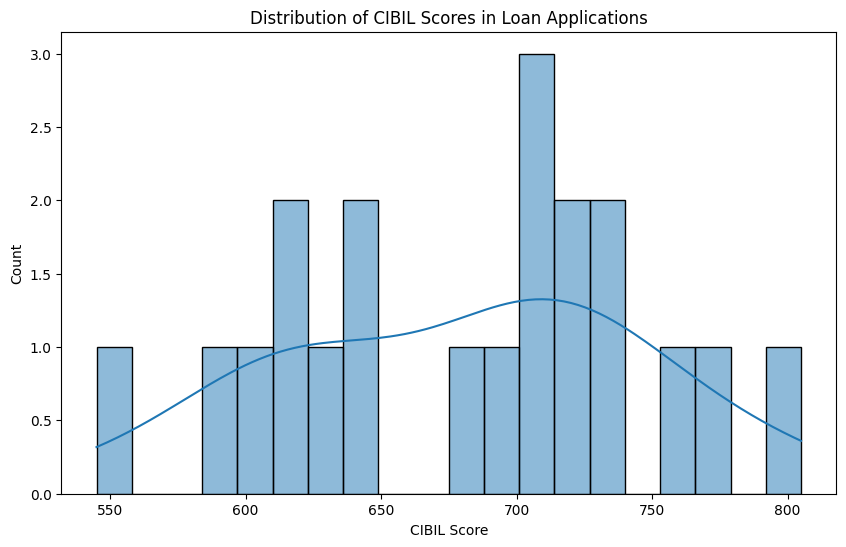

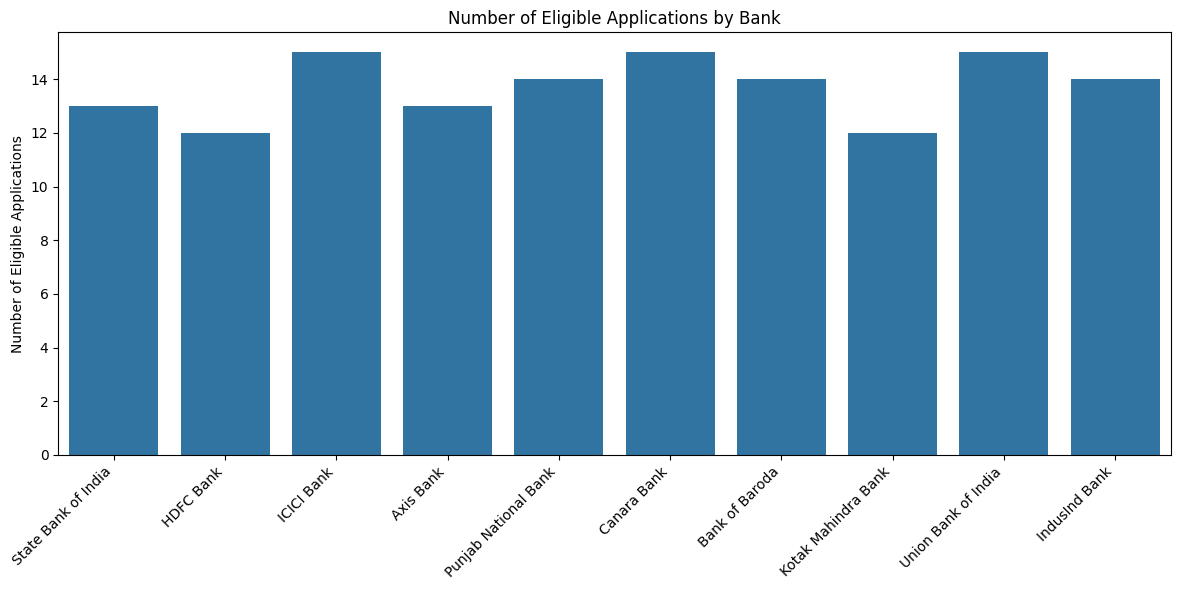

In [ ]:
# First, generate the datasets
loan_data = generate_realistic_loan_dataset(n_samples=20)  # Generating only 20 samples for display purposes
bank_policies = generate_bank_policies()

# Display a preview of the loan dataset
print("LOAN APPLICATIONS DATASET (First 5 rows, selected columns):")
selected_columns = ['application_id', 'name', 'loan_type', 'age', 'occupation', 'monthly_income',
                   'cibil_score', 'loan_amount_requested']
print(loan_data[selected_columns].head())

# Display loan eligibility columns for a sample application
print("\nELIGIBILITY AND INTEREST RATES (for first application):")
eligibility_columns = [col for col in loan_data.columns if col.startswith('eligible_') or col.startswith('interest_rate_')]
print(loan_data[eligibility_columns].iloc[0])

# Display the bank policies dataset
print("\nBANK POLICIES DATASET (First 10 rows):")
print(bank_policies.head(10))

# Show basic statistics on loan dataset
print("\nLOAN DATASET STATISTICS:")
stats_columns = ['age', 'monthly_income', 'cibil_score', 'loan_amount_requested']
print(loan_data[stats_columns].describe())

# Count of loan types
print("\nLOAN TYPE DISTRIBUTION:")
print(loan_data['loan_type'].value_counts())

# Create a visualization of CIBIL scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['cibil_score'], bins=20, kde=True)
plt.title('Distribution of CIBIL Scores in Loan Applications')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

# Create a visualization of loan eligibility by bank
eligibility_counts = {}
banks = [
    'State Bank of India', 'HDFC Bank', 'ICICI Bank', 'Axis Bank', 'Punjab National Bank',
    'Canara Bank', 'Bank of Baroda', 'Kotak Mahindra Bank', 'Union Bank of India', 'IndusInd Bank'
]

for bank in banks:
    bank_key = bank.replace(" ", "_")
    eligible_col = f'eligible_{bank_key}'
    eligibility_counts[bank] = loan_data[eligible_col].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=list(eligibility_counts.keys()), y=list(eligibility_counts.values()))
plt.title('Number of Eligible Applications by Bank')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Eligible Applications')
plt.tight_layout()
plt.show()

### 2. Model Training and Feature Engineering

In [ ]:
def preprocess_data(df):
    """Preprocess the loan application data for modeling"""
    # Make a copy to avoid modifying the original
    data = df.copy()

    # Create financial ratios
    data['dti_ratio'] = data['current_emi'] / data['monthly_income']
    data['loan_to_income_ratio'] = data['loan_amount_requested'] / data['annual_income']

    # Fill missing values with 0 for financial metrics
    for col in ['current_emi', 'dti_ratio', 'loan_to_income_ratio']:
        data[col] = data[col].fillna(0)

    # Create one-hot encodings for categorical variables
    categorical_cols = ['gender', 'marital_status', 'occupation', 'loan_type']

    # Create dummy variables
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Scale numerical features
    numerical_cols = ['age', 'monthly_income', 'cibil_score', 'existing_loans',
                      'employment_years', 'credit_history_years', 'loan_amount_requested',
                      'dti_ratio', 'loan_to_income_ratio']

    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    return data

In [ ]:
def extract_features_for_model(df, bank_name):
    """Extract features for specific bank's eligibility model"""
    # Get the eligibility column for this bank
    eligibility_col = f'eligible_{bank_name.replace(" ", "_")}'

    # Basic financial and demographic features
    features = ['age', 'monthly_income', 'cibil_score', 'existing_loans',
                'employment_years', 'credit_history_years', 'loan_amount_requested',
                'dti_ratio', 'loan_to_income_ratio', 'dependents']

    # Add loan type dummies
    loan_type_cols = [col for col in df.columns if col.startswith('loan_type_')]
    features.extend(loan_type_cols)

    # Add occupation dummies
    occupation_cols = [col for col in df.columns if col.startswith('occupation_')]
    features.extend(occupation_cols)

    # Add other demographic dummies
    gender_cols = [col for col in df.columns if col.startswith('gender_')]
    marital_cols = [col for col in df.columns if col.startswith('marital_status_')]
    features.extend(gender_cols)
    features.extend(marital_cols)

    # Return X and y
    X = df[features]
    y = df[eligibility_col]

    return X, y


In [ ]:
def train_bank_models(df, bank_names):
    """Train eligibility models for each bank"""
    # Preprocess the data
    processed_data = preprocess_data(df)

    # Store models
    models = {}
    feature_importances = {}

    # Train models for each bank
    for bank in bank_names:
        bank_key = bank.replace(" ", "_")
        X, y = extract_features_for_model(processed_data, bank)

        # Split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train Random Forest model
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_pred)

        # Train XGBoost model
        xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_pred = xgb_model.predict(X_test)
        xgb_accuracy = accuracy_score(y_test, xgb_pred)

        # Choose the better model
        if xgb_accuracy > rf_accuracy:
            models[bank_key] = {
                'model': xgb_model,
                'accuracy': xgb_accuracy,
                'feature_names': X.columns.tolist(),
                'type': 'xgboost'
            }
            # Get feature importances for XGBoost
            importances = xgb_model.feature_importances_
        else:
            models[bank_key] = {
                'model': rf_model,
                'accuracy': rf_accuracy,
                'feature_names': X.columns.tolist(),
                'type': 'random_forest'
            }
            # Get feature importances for Random Forest
            importances = rf_model.feature_importances_

        # Store feature importances
        feature_importances[bank_key] = dict(zip(X.columns, importances))

        print(f"Trained model for {bank} - Accuracy: {models[bank_key]['accuracy']:.4f}")

    return models, feature_importances

### 3. Novel Algorithms - Suitability Score and Recommendations

In [ ]:
def calculate_loan_eligibility(bank_name, loan_type, user_data):
    """Enhanced eligibility check with special considerations for edge cases"""
    # Extract user data
    age = user_data['age']
    monthly_income = user_data['monthly_income']
    occupation = user_data['occupation']
    cibil_score = user_data['cibil_score']
    employment_years = user_data['employment_years']
    existing_loans = user_data['existing_loans']
    loan_amount = user_data['loan_amount_requested']
    credit_history_years = user_data.get('credit_history_years', 0)
    loan_tenure_years = user_data.get('loan_tenure_years', 0)  # Get loan tenure

    # Calculate debt-to-income ratio
    dti_ratio = (user_data.get('current_emi', 0) / monthly_income) if monthly_income > 0 else 1

    # Basic eligibility (standard checks from original function)
    standard_eligibility = False

    # Store the maximum age limit and alternative tenure info for each bank
    max_age_limit = 0
    max_possible_tenure = 0
    tenure_eligible = True  # Default to True

    # SBI criteria
    if bank_name == 'State Bank of India':
        min_cibil = 650 if loan_type == 'Home' else (620 if loan_type == 'Car' else 600)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 25000 if loan_type == 'Home' else (20000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # HDFC criteria
    elif bank_name == 'HDFC Bank':
        min_cibil = 680 if loan_type == 'Home' else (650 if loan_type == 'Car' else 630)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 30000 if loan_type == 'Home' else (25000 if loan_type == 'Car' else 20000)
        min_employment = 1.5 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)
        max_age_limit = 70  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 23 and age <= 70 and
                      tenure_eligible)

    # ICICI criteria
    elif bank_name == 'ICICI Bank':
        min_cibil = 670 if loan_type == 'Home' else (640 if loan_type == 'Car' else 620)
        max_dti = 0.6 if loan_type == 'Home' else (0.5 if loan_type == 'Car' else 0.4)
        min_income = 28000 if loan_type == 'Home' else (22000 if loan_type == 'Car' else 18000)
        min_employment = 1.8 if loan_type == 'Home' else (1.2 if loan_type == 'Car' else 0.8)
        max_age_limit = 68  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 22 and age <= 68 and
                      tenure_eligible)

    # Axis criteria
    elif bank_name == 'Axis Bank':
        min_cibil = 660 if loan_type == 'Home' else (630 if loan_type == 'Car' else 610)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 27000 if loan_type == 'Home' else (21000 if loan_type == 'Car' else 16000)
        min_employment = 1.7 if loan_type == 'Home' else (1.1 if loan_type == 'Car' else 0.6)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # PNB criteria
    elif bank_name == 'Punjab National Bank':
        min_cibil = 630 if loan_type == 'Home' else (600 if loan_type == 'Car' else 580)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 22000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)
        max_age_limit = 63  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 63 and
                      tenure_eligible)

    # Canara criteria
    elif bank_name == 'Canara Bank':
        min_cibil = 620 if loan_type == 'Home' else (590 if loan_type == 'Car' else 570)
        max_dti = 0.45 if loan_type == 'Home' else (0.35 if loan_type == 'Car' else 0.3)
        min_income = 20000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # Bank of Baroda criteria
    elif bank_name == 'Bank of Baroda':
        min_cibil = 625 if loan_type == 'Home' else (595 if loan_type == 'Car' else 575)
        max_dti = 0.48 if loan_type == 'Home' else (0.38 if loan_type == 'Car' else 0.32)
        min_income = 21000 if loan_type == 'Home' else (19000 if loan_type == 'Car' else 16000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # Kotak criteria
    elif bank_name == 'Kotak Mahindra Bank':
        min_cibil = 675 if loan_type == 'Home' else (645 if loan_type == 'Car' else 625)
        max_dti = 0.55 if loan_type == 'Home' else (0.45 if loan_type == 'Car' else 0.35)
        min_income = 30000 if loan_type == 'Home' else (25000 if loan_type == 'Car' else 20000)
        min_employment = 1.5 if loan_type == 'Home' else (1 if loan_type == 'Car' else 0.5)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # Union Bank criteria
    elif bank_name == 'Union Bank of India':
        min_cibil = 610 if loan_type == 'Home' else (590 if loan_type == 'Car' else 570)
        max_dti = 0.5 if loan_type == 'Home' else (0.4 if loan_type == 'Car' else 0.3)
        min_income = 20000 if loan_type == 'Home' else (18000 if loan_type == 'Car' else 15000)
        min_employment = 2 if loan_type == 'Home' else (1.5 if loan_type == 'Car' else 1)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 21 and age <= 65 and
                      tenure_eligible)

    # IndusInd criteria
    elif bank_name == 'IndusInd Bank':
        min_cibil = 670 if loan_type == 'Home' else (640 if loan_type == 'Car' else 620)
        max_dti = 0.6 if loan_type == 'Home' else (0.5 if loan_type == 'Car' else 0.4)
        min_income = 35000 if loan_type == 'Home' else (30000 if loan_type == 'Car' else 25000)
        min_employment = 1 if loan_type == 'Home' else (0.8 if loan_type == 'Car' else 0.5)
        max_age_limit = 65  # Maximum age at loan maturity

        # Check if age at end of tenure exceeds max age limit (only if tenure is provided)
        if loan_tenure_years > 0:
            age_at_maturity = age + loan_tenure_years
            if age_at_maturity > max_age_limit:
                max_possible_tenure = max(1, max_age_limit - age)  # Calculate maximum possible tenure
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_possible_tenure
                tenure_eligible = False
            else:
                tenure_eligible = True
                user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max_age_limit - age

        standard_eligibility = (cibil_score >= min_cibil and
                      dti_ratio <= max_dti and
                      monthly_income >= min_income and
                      employment_years >= min_employment and
                      age >= 23 and age <= 65 and
                      tenure_eligible)

    # Store tenure information in user_data for explanation generation
    if loan_tenure_years > 0 and not tenure_eligible:
        user_data[f'tenure_reason_{bank_name.replace(" ", "_")}'] = f"The requested loan tenure of {loan_tenure_years} years would exceed the maximum age limit of {max_age_limit} years at loan maturity."

    # Special case handling for fresh graduates with good credit
    special_eligibility = False

    # Consider fresh graduates with good profile on a case-by-case basis
    if not standard_eligibility and loan_type == 'Car' and occupation == 'Salaried-Private':
        # Fresh graduate with good credit score and income
        if (employment_years < 1 and
            employment_years >= 0.5 and
            cibil_score >= 700 and
            monthly_income >= 40000 and
            dti_ratio <= 0.2):

            # Public sector banks are more flexible for young professionals
            if bank_name in ['Punjab National Bank', 'Canara Bank', 'Bank of Baroda', 'Union Bank of India']:
                if loan_amount <= monthly_income * 8:  # Restrict to 8 months' salary
                    # Check tenure even for special cases (only if tenure is provided)
                    if loan_tenure_years > 0:
                        age_at_maturity = age + loan_tenure_years
                        max_age_limit = 65  # Default for most banks

                        if bank_name == 'Punjab National Bank':
                            max_age_limit = 63

                        if age_at_maturity <= max_age_limit:
                            special_eligibility = True
                        else:
                            user_data[f'max_tenure_{bank_name.replace(" ", "_")}'] = max(1, max_age_limit - age)
                            user_data[f'tenure_reason_{bank_name.replace(" ", "_")}'] = f"The requested loan tenure of {loan_tenure_years} years would exceed the maximum age limit of {max_age_limit} years at loan maturity."
                    else:
                        special_eligibility = True

    # Return either standard eligibility or special case eligibility
    return standard_eligibility or special_eligibility

def generate_interest_rate(bank_name, loan_type, user_data):
    """
    Generate a deterministic interest rate based on bank, loan type, and user profile.
    Uses a seed based on user attributes to ensure consistency for same inputs.
    """
    # Extract user data that influences interest rate
    cibil_score = user_data['cibil_score']
    age = user_data['age']
    employment_years = user_data.get('employment_years', 0)
    loan_amount = user_data['loan_amount_requested']

    # Create a deterministic seed based on user attributes
    seed_value = cibil_score * 1000 + age * 100 + int(employment_years * 10) + (loan_amount % 1000)

    # Base rates by loan type
    if loan_type == 'Home':
        base_rate = 8.5
    elif loan_type == 'Car':
        base_rate = 9.5
    elif loan_type == 'Education':
        base_rate = 10.0
    elif loan_type == 'Personal':
        base_rate = 12.0
    else:  # Gold
        base_rate = 11.0

    # Bank adjustment
    bank_adjustments = {
        'State Bank of India': -0.2,
        'HDFC Bank': 0.1,
        'ICICI Bank': 0.0,
        'Axis Bank': 0.05,
        'Punjab National Bank': -0.3,
        'Canara Bank': -0.25,
        'Bank of Baroda': -0.2,
        'Kotak Mahindra Bank': 0.15,
        'Union Bank of India': -0.3,
        'IndusInd Bank': 0.2
    }

    # CIBIL score adjustment
    if cibil_score >= 800:
        cibil_adjustment = -0.5
    elif cibil_score >= 750:
        cibil_adjustment = -0.3
    elif cibil_score >= 700:
        cibil_adjustment = -0.1
    elif cibil_score >= 650:
        cibil_adjustment = 0.0
    elif cibil_score >= 600:
        cibil_adjustment = 0.2
    else:
        cibil_adjustment = 0.5

    # Calculate final rate with deterministic randomness
    # Instead of random.uniform, use a deterministic calculation
    random_adjustment = ((seed_value % 20) - 10) / 100  # Value between -0.1 and 0.1

    final_rate = base_rate + bank_adjustments.get(bank_name, 0) + cibil_adjustment + random_adjustment

    return round(final_rate, 2)

def generate_processing_time(bank_name, loan_type):
    """
    Generate a deterministic processing time in days for a loan.
    Uses a deterministic approach to ensure consistency.
    """
    # Base processing time by loan type
    if loan_type == 'Home':
        base_time = 15
    elif loan_type == 'Car':
        base_time = 7
    elif loan_type == 'Education':
        base_time = 10
    elif loan_type == 'Personal':
        base_time = 5
    else:  # Gold
        base_time = 3

    # Bank efficiency adjustments (days)
    bank_adjustments = {
        'State Bank of India': 2,
        'HDFC Bank': -2,
        'ICICI Bank': -1,
        'Axis Bank': -1.5,
        'Punjab National Bank': 3,
        'Canara Bank': 2.5,
        'Bank of Baroda': 2,
        'Kotak Mahindra Bank': -2,
        'Union Bank of India': 3,
        'IndusInd Bank': -1.5
    }

    # Deterministic adjustment instead of random
    # Use the bank name and loan type to create a deterministic seed
    seed_str = bank_name + loan_type
    seed_value = sum(ord(c) for c in seed_str)
    deterministic_adjustment = (seed_value % 3) - 1  # Value of -1, 0, or 1

    # Calculate processing time
    time = base_time + bank_adjustments.get(bank_name, 0) + deterministic_adjustment

    return max(1, int(time))  # Ensure at least 1 day

def calculate_suitability_score(user_data, bank_name, loan_type, eligibility_prob, all_banks_data):
    """
    Calculate a suitability score that considers multiple factors beyond eligibility.
    This is a novel algorithm that dynamically weighs different components.
    """
    # Extract user financial data
    cibil_score = user_data['cibil_score']
    monthly_income = user_data['monthly_income']
    loan_amount = user_data['loan_amount_requested']
    existing_loans = user_data['existing_loans']
    current_emi = user_data.get('current_emi', 0)
    employment_years = user_data.get('employment_years', 0)
    credit_history_years = user_data.get('credit_history_years', 0)
    occupation = user_data.get('occupation', '')
    age = user_data.get('age', 30)
    loan_tenure_years = user_data.get('loan_tenure_years', 0)

    # Get bank-specific values
    bank_key = bank_name.replace(" ", "_")
    interest_rate = user_data.get(f'interest_rate_{bank_key}', None)
    processing_time = user_data.get(f'processing_time_{bank_key}', None)
    max_tenure = user_data.get(f'max_tenure_{bank_key}', None)

    # Check actual eligibility
    is_eligible = user_data.get(f'eligible_{bank_key}', False)

    # If not eligible at all, calculate a borderline score based on how close they are to qualifying
    if not is_eligible:
        # Check how close they are to meeting requirements
        near_eligibility_score = 0.1  # Base score for ineligible applications

        # For fresh graduates with good credit score but short employment, give better score
        if (loan_type == 'Car' and
            employment_years < 1 and
            employment_years >= 0.5 and
            cibil_score >= 700 and
            occupation == 'Salaried-Private' and
            monthly_income >= 40000):

            # Public sector banks are more flexible
            if bank_name in ['Punjab National Bank', 'Canara Bank', 'Bank of Baroda', 'Union Bank of India']:
                near_eligibility_score = 0.3  # Higher score to show they're closer to eligibility
            else:
                near_eligibility_score = 0.2  # Slightly higher score for private banks

        return near_eligibility_score

    # Calculate debt-to-income ratio
    dti_ratio = current_emi / monthly_income if monthly_income > 0 else 1

    # Component 1: Eligibility Score (30% weight)
    # Base on credit profile factors

    # CIBIL score component (higher is better)
    if cibil_score >= 750:
        cibil_component = 1.0
    elif cibil_score >= 700:
        cibil_component = 0.85
    elif cibil_score >= 650:
        cibil_component = 0.7
    elif cibil_score >= 600:
        cibil_component = 0.5
    else:
        cibil_component = 0.3

    # DTI ratio component (lower is better)
    if dti_ratio <= 0.2:
        dti_component = 1.0
    elif dti_ratio <= 0.3:
        dti_component = 0.85
    elif dti_ratio <= 0.4:
        dti_component = 0.6
    elif dti_ratio <= 0.5:
        dti_component = 0.4
    else:
        dti_component = 0.2

    # Employment history component (longer is better)
    if employment_years >= 5:
        employment_component = 1.0
    elif employment_years >= 3:
        employment_component = 0.8
    elif employment_years >= 2:
        employment_component = 0.6
    elif employment_years >= 1:
        employment_component = 0.4
    else:
        employment_component = 0.2

    # Credit history component (longer is better)
    if credit_history_years >= 7:
        credit_history_component = 1.0
    elif credit_history_years >= 5:
        credit_history_component = 0.85
    elif credit_history_years >= 3:
        credit_history_component = 0.7
    elif credit_history_years >= 1:
        credit_history_component = 0.5
    else:
        credit_history_component = 0.3

    # Tenure component (only if loan tenure and max tenure are provided)
    if loan_tenure_years > 0 and max_tenure is not None:
        if loan_tenure_years <= max_tenure * 0.6:  # Well within max tenure
            tenure_component = 1.0
        elif loan_tenure_years <= max_tenure * 0.8:  # Moderately within max tenure
            tenure_component = 0.8
        else:  # Close to max tenure
            tenure_component = 0.6
    else:
        tenure_component = 1.0  # Default if tenure info not available

    # Calculate weighted eligibility score
    if loan_tenure_years > 0 and max_tenure is not None:
        # Include tenure in eligibility score if available
        eligibility_score = (
            cibil_component * 0.35 +
            dti_component * 0.25 +
            employment_component * 0.15 +
            credit_history_component * 0.1 +
            tenure_component * 0.15
        )
    else:
        # Original weights if tenure not specified
        eligibility_score = (
            cibil_component * 0.4 +
            dti_component * 0.3 +
            employment_component * 0.2 +
            credit_history_component * 0.1
        )

    # Component 2: Interest Rate Favorability (25% weight)
    # Compare against other banks' rates for this user
    if interest_rate is None:
        interest_score = 0.0
    else:
        other_rates = []
        for other_bank in all_banks_data:
            other_key = other_bank.replace(" ", "_")
            other_rate = user_data.get(f'interest_rate_{other_key}', None)
            if other_rate is not None:
                other_rates.append(other_rate)

        if other_rates:
            avg_rate = sum(other_rates) / len(other_rates)
            min_rate = min(other_rates)

            # Better rates get higher scores
            if interest_rate <= min_rate:
                interest_score = 1.0  # Best possible rate
            else:
                rate_diff = interest_rate - min_rate
                interest_score = max(0, 1.0 - (rate_diff / 2.0))  # Penalize higher rates
        else:
            interest_score = 0.5  # Neutral if no comparison available

    # Component 3: Processing Efficiency (15% weight)
    # Compare processing time against other banks
    if processing_time is None:
        processing_score = 0.0
    else:
        other_times = []
        for other_bank in all_banks_data:
            other_key = other_bank.replace(" ", "_")
            other_time = user_data.get(f'processing_time_{other_key}', None)
            if other_time is not None:
                other_times.append(other_time)

        if other_times:
            min_time = min(other_times)

            # Faster processing gets higher scores
            if processing_time <= min_time:
                processing_score = 1.0  # Best possible processing time
            else:
                time_diff = processing_time - min_time
                processing_score = max(0, 1.0 - (time_diff / 10.0))  # Penalize longer times
        else:
            processing_score = 0.5  # Neutral if no comparison available

    # Component 4: Affordability (30% weight)
    # Check if the loan is affordable for the user
    annual_income = monthly_income * 12
    income_ratio = loan_amount / annual_income if annual_income > 0 else 999

    if loan_type == 'Home':
        ideal_ratio = 4.0  # 4x annual income is reasonable for home loans
    elif loan_type == 'Car':
        ideal_ratio = 0.8  # 80% of annual income for car loans
    elif loan_type == 'Education':
        ideal_ratio = 1.5  # 1.5x annual income for education loans
    elif loan_type == 'Personal':
        ideal_ratio = 0.5  # 50% of annual income for personal loans
    else:  # Gold
        ideal_ratio = 0.3  # 30% of annual income for gold loans

    # Calculate affordability score
    if income_ratio <= ideal_ratio:
        affordability_score = 1.0
    else:
        # Penalize loans that are too large relative to income
        ratio_diff = income_ratio - ideal_ratio
        affordability_score = max(0, 1.0 - (ratio_diff / ideal_ratio))

    # Calculate the final weighted score
    # Dynamic weights based on loan type
    if loan_type == 'Home':
        weights = {'eligibility': 0.3, 'interest': 0.3, 'processing': 0.1, 'affordability': 0.3}
    elif loan_type == 'Car':
        weights = {'eligibility': 0.3, 'interest': 0.25, 'processing': 0.15, 'affordability': 0.3}
    elif loan_type == 'Education':
        weights = {'eligibility': 0.35, 'interest': 0.2, 'processing': 0.15, 'affordability': 0.3}
    elif loan_type == 'Personal':
        weights = {'eligibility': 0.3, 'interest': 0.2, 'processing': 0.2, 'affordability': 0.3}
    else:  # Gold
        weights = {'eligibility': 0.25, 'interest': 0.25, 'processing': 0.2, 'affordability': 0.3}

    # Final weighted score calculation
    final_score = (
        eligibility_score * weights['eligibility'] +
        interest_score * weights['interest'] +
        processing_score * weights['processing'] +
        affordability_score * weights['affordability']
    )

    return round(final_score, 2)  # Round to 2 decimal places for cleaner display

def get_bank_recommendations(user_data, models, bank_names):
  """
  Generate bank recommendations for a user based on novel suitability scoring.
  Return the top 5 recommended banks.
  """
  # Create a deep copy of user_data to avoid modifying the original
  import copy
  user_data_copy = copy.deepcopy(user_data)

  recommendations = []

  # Preprocess user data
  # Create derived features
  monthly_income = user_data_copy.get('monthly_income', 0)
  annual_income = user_data_copy.get('annual_income', monthly_income * 12)
  current_emi = user_data_copy.get('current_emi', 0)

  # Calculate ratios safely
  user_data_copy['dti_ratio'] = current_emi / monthly_income if monthly_income > 0 else 1.0
  user_data_copy['loan_to_income_ratio'] = user_data_copy['loan_amount_requested'] / annual_income if annual_income > 0 else 999

  # Process each bank in a specific order to ensure consistency
  sorted_banks = sorted(bank_names)  # Use alphabetical order

  # First pass: Calculate eligibility for all banks
  for bank in sorted_banks:
      bank_key = bank.replace(" ", "_")

      # Check direct eligibility from user data (if available)
      is_eligible = user_data_copy.get(f'eligible_{bank_key}', None)

      # If we don't have direct eligibility info, calculate it using our enhanced function
      if is_eligible is None:
          is_eligible = calculate_loan_eligibility(bank, user_data_copy['loan_type'], user_data_copy)
          user_data_copy[f'eligible_{bank_key}'] = is_eligible

      # Calculate interest rate and processing time if eligible
      if is_eligible and not user_data_copy.get(f'interest_rate_{bank_key}', None):
          user_data_copy[f'interest_rate_{bank_key}'] = generate_interest_rate(bank, user_data_copy['loan_type'], user_data_copy)
          user_data_copy[f'processing_time_{bank_key}'] = generate_processing_time(bank, user_data_copy['loan_type'])

  # Second pass: Calculate suitability scores and generate recommendations
  for bank in sorted_banks:
      bank_key = bank.replace(" ", "_")

      # Get eligibility info from first pass
      is_eligible = user_data_copy.get(f'eligible_{bank_key}', False)
      eligibility_prob = 1.0 if is_eligible else 0.0

      # Calculate suitability score
      suitability_score = calculate_suitability_score(
          user_data_copy, bank, user_data_copy['loan_type'],
          eligibility_prob, sorted_banks
      )

      # Get interest rate and processing time
      interest_rate = user_data_copy.get(f'interest_rate_{bank_key}', None)
      processing_time = user_data_copy.get(f'processing_time_{bank_key}', None)

      # Generate explanation
      explanation = generate_recommendation_explanation(
          user_data_copy, bank, eligibility_prob, is_eligible,
          suitability_score, interest_rate, processing_time
      )

      recommendations.append({
          'bank': bank,
          'eligibility_probability': eligibility_prob,
          'is_eligible': is_eligible,
          'suitability_score': suitability_score,
          'interest_rate': interest_rate,
          'processing_time': processing_time,
          'explanation': explanation
      })

  # Sort by suitability score (descending), then by bank name for tiebreakers
  recommendations.sort(key=lambda x: (x['suitability_score'], x['bank']), reverse=True)

  # Return top 5 recommendations (or all if fewer than 5)
  return recommendations[:5]

def generate_recommendation_explanation(user_data, bank, eligibility_prob, is_eligible, suitability_score, interest_rate, processing_time):
   """
   Generate detailed natural language explanation for the recommendation, including EMI calculation.
   """
   loan_type = user_data['loan_type']
   loan_amount = user_data['loan_amount_requested']
   cibil_score = user_data['cibil_score']
   monthly_income = user_data.get('monthly_income', 0)
   current_emi = user_data.get('current_emi', 0)
   employment_years = user_data.get('employment_years', 0)
   credit_history_years = user_data.get('credit_history_years', 0)
   occupation = user_data.get('occupation', '')
   age = user_data.get('age', 30)
   loan_tenure_years = user_data.get('loan_tenure_years', 0)

   # Calculate debt-to-income ratio
   dti_ratio = current_emi / monthly_income if monthly_income > 0 else 1.0
   dti_percent = dti_ratio * 100

   # Get bank-specific tenure information
   bank_key = bank.replace(" ", "_")
   max_tenure = user_data.get(f'max_tenure_{bank_key}', None)
   tenure_reason = user_data.get(f'tenure_reason_{bank_key}', None)

   explanation = f"**{bank}** "

   # If not eligible, provide specific reasons with tailored advice
   if not is_eligible:
       explanation += f"has determined you are **not eligible** for your {loan_type} loan of ₹{loan_amount:,}. "

       reasons = []

       # Add specific reasons for ineligibility
       if cibil_score < 600:
           reasons.append(f"Your CIBIL score of {cibil_score} is below their minimum requirement")
       elif cibil_score < 650:
           reasons.append(f"Your CIBIL score of {cibil_score} may be insufficient for this loan type")

       if dti_ratio > 0.5:
           reasons.append(f"Your debt-to-income ratio of {dti_percent:.1f}% exceeds their maximum threshold")

       if employment_years < 1 and loan_type == 'Car':
           if cibil_score >= 700 and monthly_income >= 40000 and occupation == 'Salaried-Private':
               reasons.append(f"Your employment history of {employment_years} years is below their standard requirement, but your good credit score ({cibil_score}) and income (₹{monthly_income:,}) are positive factors")
           else:
               reasons.append(f"Your employment history of {employment_years} years is insufficient for their {loan_type} loan criteria")
       elif employment_years < 2 and loan_type == 'Home':
           reasons.append(f"Your employment history of {employment_years} years is insufficient for their {loan_type} loan criteria")

       if credit_history_years < 2 and cibil_score >= 650:
           reasons.append(f"Despite your good credit score ({cibil_score}), your credit history length ({credit_history_years} years) may be too short")

       # Add tenure-related reason if applicable
       if tenure_reason:
           reasons.append(tenure_reason)

       if reasons:
           explanation += "Reasons include: " + "; ".join(reasons) + ". "

       # Add tailored advice
       if tenure_reason and max_tenure:
           explanation += f"**Advice:** Consider reducing your loan tenure to {max_tenure} years or less to meet their age-at-maturity requirements. "

       if loan_type == 'Car' and employment_years < 1 and employment_years >= 0.5 and cibil_score >= 700:
           explanation += f"**Advice:** Consider public sector banks like Punjab National Bank or Canara Bank, which may have special schemes for young professionals. Alternatively, waiting until you complete 1 year of employment would significantly improve your chances, or consider a smaller loan amount around ₹{int(monthly_income * 8):,}."
       elif cibil_score < 650:
           explanation += f"**Advice:** Focus on improving your credit score to at least 650-700 for better loan eligibility."
       elif employment_years < 1:
           explanation += f"**Advice:** Consider waiting until you complete at least 1 year of employment or explore getting a co-applicant with longer employment history."

       return explanation

   # For eligible applications, describe the suitability
   if suitability_score > 0.8:
       explanation += f"is an **excellent match** for your {loan_type} loan needs with a suitability score of {suitability_score}. "
   elif suitability_score > 0.6:
       explanation += f"is a **good match** for your {loan_type} loan needs with a suitability score of {suitability_score}. "
   elif suitability_score > 0.4:
       explanation += f"is a **moderate match** for your {loan_type} loan needs with a suitability score of {suitability_score}. "
   else:
       explanation += f"is a **poor match** for your {loan_type} loan needs with a suitability score of {suitability_score}. "

   # Add strengths
   strengths = []

   if cibil_score >= 750:
       strengths.append(f"excellent credit score ({cibil_score})")
   elif cibil_score >= 700:
       strengths.append(f"good credit score ({cibil_score})")
   elif cibil_score >= 650:
       strengths.append(f"fair credit score ({cibil_score})")

   if dti_ratio <= 0.3:
       strengths.append(f"healthy debt-to-income ratio ({dti_percent:.1f}%)")

   if employment_years >= 5:
       strengths.append(f"strong employment history ({employment_years} years)")
   elif employment_years >= 3:
       strengths.append(f"good employment history ({employment_years} years)")

   if monthly_income >= 75000:
       strengths.append(f"excellent monthly income (₹{monthly_income:,})")
   elif monthly_income >= 50000:
       strengths.append(f"solid monthly income (₹{monthly_income:,})")
   elif monthly_income >= 30000:
       strengths.append(f"decent monthly income (₹{monthly_income:,})")

   if credit_history_years >= 5:
       strengths.append(f"established credit history ({credit_history_years} years)")

   # Add tenure information for eligible applications
   if max_tenure and loan_tenure_years > 0 and loan_tenure_years <= max_tenure:
       strengths.append(f"appropriate loan tenure ({loan_tenure_years} years)")

   if strengths:
       explanation += f"**Strengths:** {', '.join(strengths)}. "

   # Add interest rate information if available
   if interest_rate is not None:
       explanation += f"They offer an interest rate of **{interest_rate:.2f}%** "

       # Compare to average rates
       if loan_type == 'Home' and interest_rate < 8.5:
           explanation += "(below average for home loans). "
       elif loan_type == 'Car' and interest_rate < 9.5:
           explanation += "(below average for car loans). "
       elif loan_type == 'Education' and interest_rate < 10.0:
           explanation += "(below average for education loans). "
       elif loan_type == 'Personal' and interest_rate < 12.0:
           explanation += "(below average for personal loans). "
       elif loan_type == 'Gold' and interest_rate < 11.0:
           explanation += "(below average for gold loans). "
       else:
           explanation += "(average or above for this loan type). "

   # Calculate and add EMI information if interest rate and tenure are available
   if interest_rate is not None and loan_tenure_years > 0:
       # Import the calculate_emi function or define it inline if needed
       try:
           from loan_utils import calculate_emi  # If you have this in a separate module
       except ImportError:
           # Define the function here if it's not imported
           def calculate_emi(loan_amount, interest_rate, tenure_years):
               """Calculate the Equated Monthly Installment (EMI) for a loan."""
               # Convert annual interest rate to monthly rate and percentage to decimal
               monthly_rate = interest_rate / (12 * 100)

               # Convert tenure from years to months
               tenure_months = tenure_years * 12

               # Calculate EMI using the formula: P * r * (1+r)^n / ((1+r)^n - 1)
               if monthly_rate == 0:  # Handle 0% interest case
                   return loan_amount / tenure_months

               emi = loan_amount * monthly_rate * ((1 + monthly_rate) ** tenure_months) / (((1 + monthly_rate) ** tenure_months) - 1)

               return round(emi, 2)

       # Calculate EMI
       # Use the actual tenure or max_tenure (whichever is smaller) if max_tenure is available
       effective_tenure = min(loan_tenure_years, max_tenure) if max_tenure else loan_tenure_years
       monthly_emi = calculate_emi(loan_amount, interest_rate, effective_tenure)

       # Add EMI information to the explanation
       explanation += f"Your estimated monthly EMI would be **₹{monthly_emi:,.2f}** "

       # Add affordability assessment
       if monthly_income > 0:
           emi_to_income_ratio = monthly_emi / monthly_income * 100
           explanation += f"which represents **{emi_to_income_ratio:.1f}%** of your monthly income. "

           # Add a note about affordability
           if emi_to_income_ratio <= 30:
               explanation += "This is a healthy and manageable EMI-to-income ratio. "
           elif emi_to_income_ratio <= 40:
               explanation += "This is slightly high but likely manageable EMI-to-income ratio. "
           elif emi_to_income_ratio <= 50:
               explanation += "This is a high EMI-to-income ratio which may strain your monthly budget. "
           else:
               explanation += "This is a very high EMI-to-income ratio which may significantly strain your finances. "
       else:
           explanation += ". "

       # Add information about total interest to be paid
       total_payments = monthly_emi * effective_tenure * 12
       total_interest = total_payments - loan_amount
       explanation += f"Over the {effective_tenure}-year tenure, you would pay a total interest of **₹{total_interest:,.2f}**. "

   # Add processing time if available
   if processing_time is not None:
       explanation += f"Estimated processing time is **{processing_time} days**. "

   # Add information about maximum loan tenure if applicable
   if max_tenure and loan_tenure_years > 0 and not explanation.endswith(f"Over the {max_tenure}-year tenure, you would pay a total interest of **₹{total_interest:,.2f}**. "):
       explanation += f"Maximum loan tenure allowed based on your age is **{max_tenure} years**. "

   # Add concerns or improvement areas if suitability is not excellent
   if suitability_score < 0.8:
       concerns = []

       if cibil_score < 700:
           concerns.append("improving your credit score")

       if dti_ratio > 0.4:
           concerns.append("reducing your existing debt")

       if employment_years < 3:
           concerns.append("longer employment history")

       if monthly_income < 50000:
           concerns.append("higher income stability")

       if credit_history_years < 3:
           concerns.append("building longer credit history")

       # Add tenure concern if close to maximum
       if max_tenure and loan_tenure_years > 0 and loan_tenure_years > max_tenure * 0.8:
           concerns.append(f"considering a shorter loan tenure to maintain flexibility")

       if concerns:
           explanation += f"**Areas for Improvement:** {', '.join(concerns)} could help you get better loan terms."

   # Add special notes for unique cases
   if loan_type == 'Car' and employment_years < 1 and is_eligible:
       explanation += " **Note:** As a fresh professional with less than 1 year employment, you've qualified based on your strong credit profile and income. Consider this a special case approval."

   return explanation

### 4. Visualization Functions

In [ ]:
def visualize_eligibility_radar(recommendations):
    """Create a radar chart showing eligibility across top banks"""
    banks = [r['bank'] for r in recommendations]
    scores = [r['eligibility_probability'] for r in recommendations]

    # Number of variables
    N = len(banks)

    # What will be the angle of each axis in the plot (divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Add the scores for the last point to close the loop
    scores += scores[:1]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], banks, size=12)

    # Draw the eligibility line
    ax.plot(angles, scores, linewidth=2, linestyle='solid', label='Eligibility Probability')
    ax.fill(angles, scores, alpha=0.25)

    # Add legend and title
    plt.title('Loan Eligibility Probability by Bank', size=15, y=1.1)

    return fig

In [ ]:
def visualize_suitability_breakdown(recommendations):
    """Create a bar chart showing the suitability score breakdown"""
    banks = [r['bank'] for r in recommendations]
    suitability_scores = [r['suitability_score'] for r in recommendations]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create bars
    bars = ax.bar(banks, suitability_scores, color='skyblue')

    # Add eligibility probability as a line
    eligibility_probs = [r['eligibility_probability'] for r in recommendations]
    ax2 = ax.twinx()
    ax2.plot(banks, eligibility_probs, 'ro-', linewidth=2, label='Eligibility Probability')
    ax2.set_ylim(0, 1.1)

    # Add interest rates as text on bars
    for i, r in enumerate(recommendations):
        if r['interest_rate'] is not None:
            ax.text(i, r['suitability_score'] / 2, f"{r['interest_rate']:.2f}%",
                   ha='center', va='center', color='white', fontweight='bold')

    # Add labels and title
    ax.set_xlabel('Banks')
    ax.set_ylabel('Suitability Score')
    ax2.set_ylabel('Eligibility Probability')
    plt.title('Bank Recommendation Suitability Scores')

    # Add legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    return fig

In [ ]:
def visualize_processing_times(recommendations):
    """Create a horizontal bar chart showing processing times"""
    # Filter recommendations with processing times
    filtered_recs = [r for r in recommendations if r['processing_time'] is not None]

    if not filtered_recs:
        return None

    banks = [r['bank'] for r in filtered_recs]
    processing_times = [r['processing_time'] for r in filtered_recs]

    # Sort by processing time
    sorted_indices = np.argsort(processing_times)
    sorted_banks = [banks[i] for i in sorted_indices]
    sorted_times = [processing_times[i] for i in sorted_indices]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create horizontal bars
    bars = ax.barh(sorted_banks, sorted_times, color='lightgreen')

    # Add processing times as text on bars
    for i, v in enumerate(sorted_times):
        ax.text(v + 0.1, i, f"{v} days", va='center')

    # Add labels and title
    ax.set_xlabel('Processing Time (days)')
    ax.set_ylabel('Banks')
    plt.title('Loan Processing Times by Bank')

    plt.tight_layout()
    return fig

In [ ]:
def visualize_interest_rates(recommendations):
    """Create a horizontal bar chart showing interest rates"""
    # Filter recommendations with interest rates
    filtered_recs = [r for r in recommendations if r['interest_rate'] is not None]

    if not filtered_recs:
        return None

    banks = [r['bank'] for r in filtered_recs]
    interest_rates = [r['interest_rate'] for r in filtered_recs]

    # Sort by interest rate
    sorted_indices = np.argsort(interest_rates)
    sorted_banks = [banks[i] for i in sorted_indices]
    sorted_rates = [interest_rates[i] for i in sorted_indices]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create horizontal bars
    bars = ax.barh(sorted_banks, sorted_rates, color='salmon')

    # Add interest rates as text on bars
    for i, v in enumerate(sorted_rates):
        ax.text(v + 0.1, i, f"{v:.2f}%", va='center')

    # Add labels and title
    ax.set_xlabel('Interest Rate (%)')
    ax.set_ylabel('Banks')
    plt.title('Interest Rates by Bank')

    plt.tight_layout()
    return fig

In [ ]:
def visualize_feature_importance(feature_importances, bank_name):
    """Create a horizontal bar chart showing feature importance for a bank's model"""
    if bank_name not in feature_importances:
        return None

    # Get feature importances for this bank
    importances = feature_importances[bank_name]

    # Sort by importance
    sorted_features = sorted(importances.items(), key=lambda x: x[1], reverse=True)
    features = [item[0] for item in sorted_features[:10]]  # Top 10 features
    values = [item[1] for item in sorted_features[:10]]

    # Clean up feature names for display
    display_features = []
    for f in features:
        if f.startswith('loan_type_'):
            display_features.append(f.replace('loan_type_', 'Loan: '))
        elif f.startswith('occupation_'):
            display_features.append(f.replace('occupation_', 'Job: '))
        elif f.startswith('marital_status_'):
            display_features.append(f.replace('marital_status_', 'Marital: '))
        elif f.startswith('gender_'):
            display_features.append(f.replace('gender_', 'Gender: '))
        else:
            display_features.append(f.replace('_', ' ').title())

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create horizontal bars
    y_pos = np.arange(len(display_features))
    bars = ax.barh(y_pos, values, color='lightblue')

    # Add feature names
    ax.set_yticks(y_pos)
    ax.set_yticklabels(display_features)

    # Add labels and title
    ax.set_xlabel('Importance')
    plt.title(f'Top Features for {bank_name.replace("_", " ")} Loan Eligibility')

    plt.tight_layout()
    return fig

### 5. Main Execution Function

Generating synthetic loan application dataset...
Generating bank policies dataset...

Training eligibility prediction models for each bank...
Trained model for State Bank of India - Accuracy: 0.9875
Trained model for HDFC Bank - Accuracy: 0.9875
Trained model for ICICI Bank - Accuracy: 0.9875
Trained model for Axis Bank - Accuracy: 0.9925
Trained model for Punjab National Bank - Accuracy: 0.9875
Trained model for Canara Bank - Accuracy: 0.9850
Trained model for Bank of Baroda - Accuracy: 0.9725
Trained model for Kotak Mahindra Bank - Accuracy: 0.9875
Trained model for Union Bank of India - Accuracy: 0.9925
Trained model for IndusInd Bank - Accuracy: 0.9875

Models Performance Summary:
State Bank of India: 0.9875 accuracy, xgboost model
HDFC Bank: 0.9875 accuracy, xgboost model
ICICI Bank: 0.9875 accuracy, xgboost model
Axis Bank: 0.9925 accuracy, xgboost model
Punjab National Bank: 0.9875 accuracy, xgboost model
Canara Bank: 0.9850 accuracy, xgboost model
Bank of Baroda: 0.9725 accurac

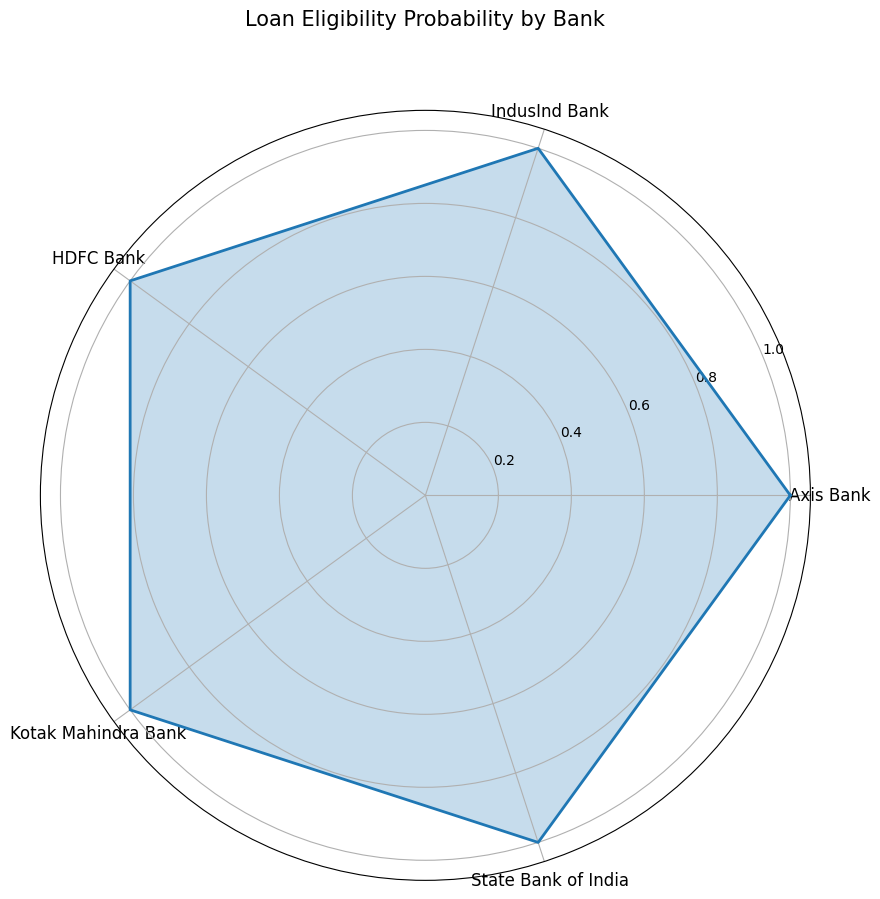

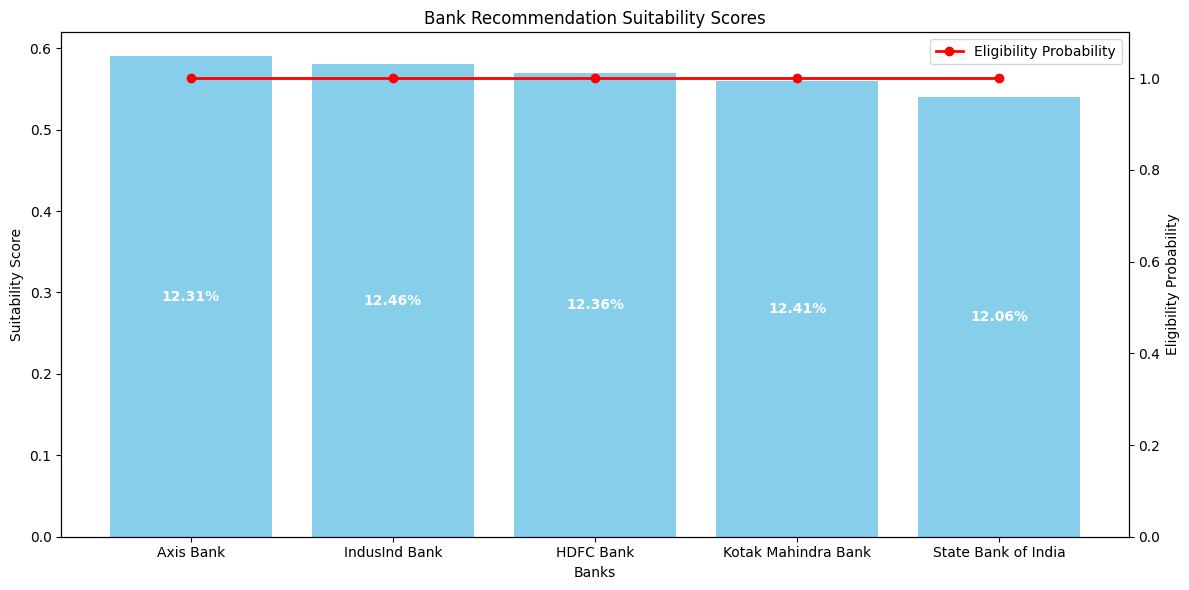

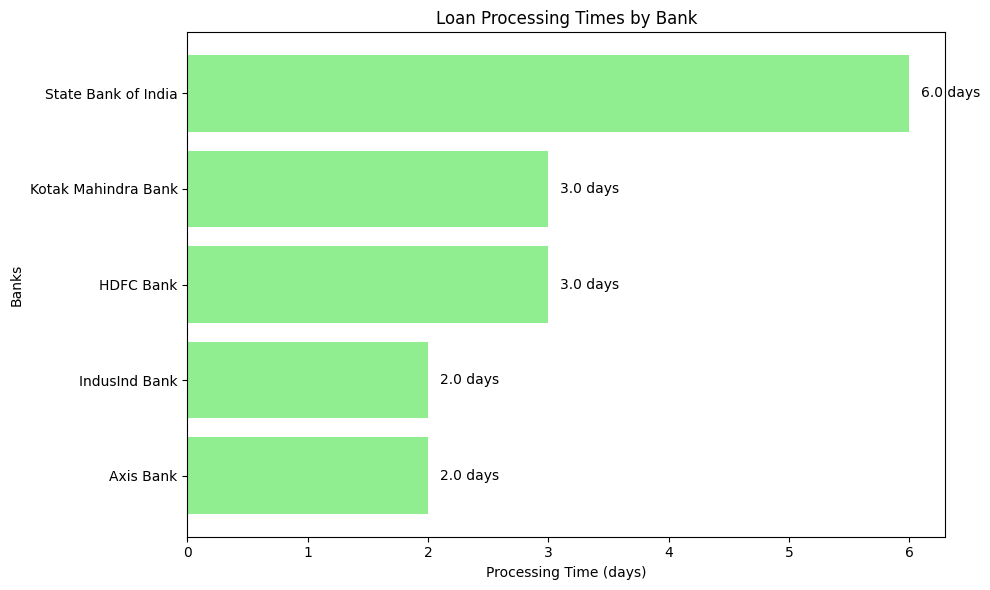

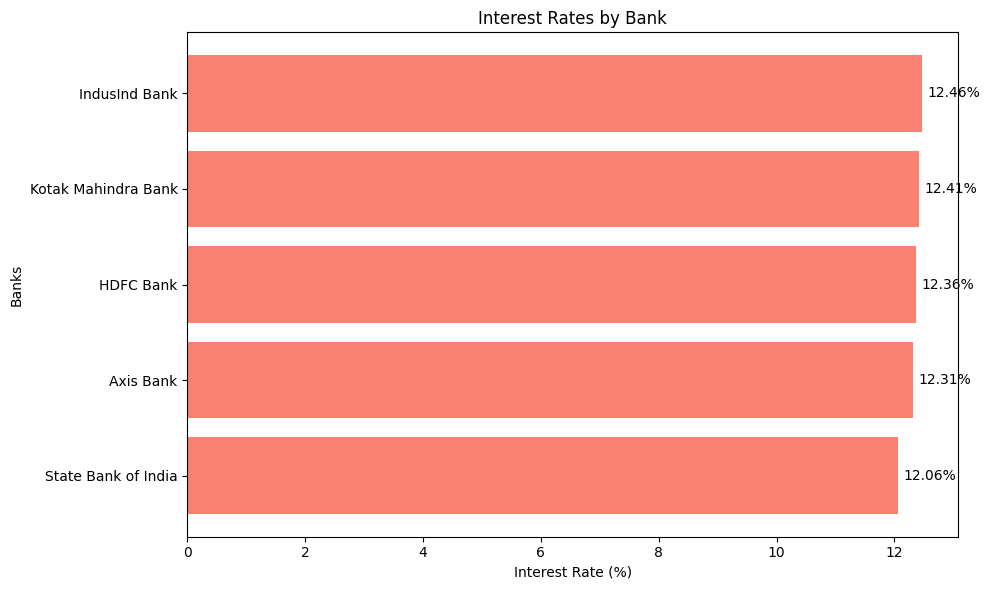

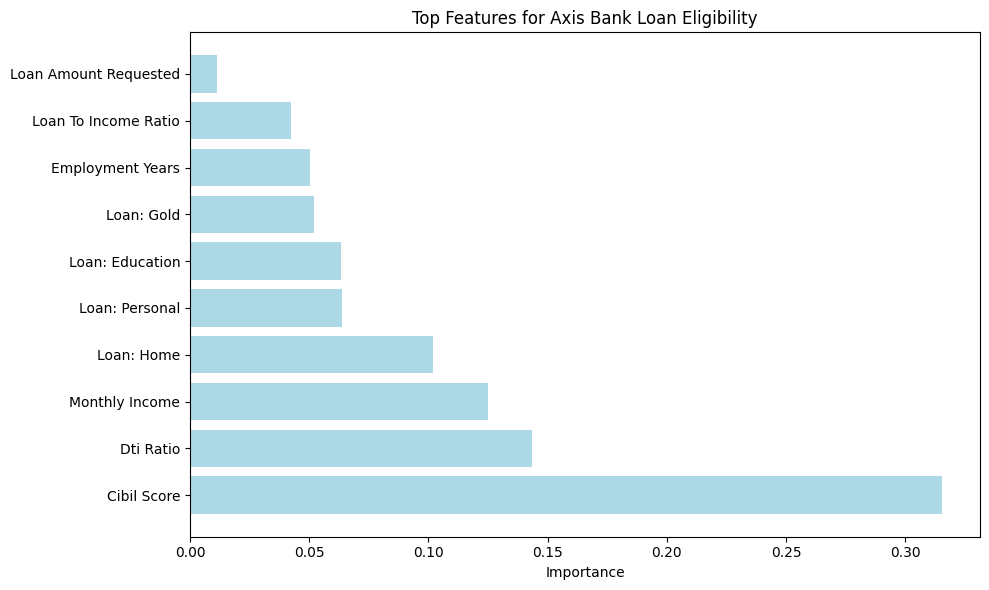

In [ ]:
def main():
    """Main execution function"""
    print("Generating synthetic loan application dataset...")
    loan_data = generate_realistic_loan_dataset(n_samples=2000)

    print("Generating bank policies dataset...")
    bank_policies = generate_bank_policies()

    # List of banks
    banks = [
        'State Bank of India', 'HDFC Bank', 'ICICI Bank', 'Axis Bank', 'Punjab National Bank',
        'Canara Bank', 'Bank of Baroda', 'Kotak Mahindra Bank', 'Union Bank of India', 'IndusInd Bank'
    ]

    bank_keys = [bank.replace(" ", "_") for bank in banks]

    print("\nTraining eligibility prediction models for each bank...")
    models, feature_importances = train_bank_models(loan_data, banks)

    # Display models performance
    print("\nModels Performance Summary:")
    for bank in banks:
        bank_key = bank.replace(" ", "_")
        if bank_key in models:
            print(f"{bank}: {models[bank_key]['accuracy']:.4f} accuracy, {models[bank_key]['type']} model")

    # Select a sample user for recommendation
    print("\nGenerating recommendations for a sample user...")
    sample_user = loan_data.iloc[42].to_dict()  # Just a random sample

    # Get recommendations
    recommendations = get_bank_recommendations(sample_user, models, banks)

    # Display recommendations
    print(f"\nTop 5 Bank Recommendations for {sample_user['name']} ({sample_user['loan_type']} Loan):")
    for i, rec in enumerate(recommendations):
        print(f"{i+1}. {rec['bank']} - Suitability Score: {rec['suitability_score']:.2f}")
        print(f"   Eligibility Probability: {rec['eligibility_probability']:.2f}")
        if rec['interest_rate'] is not None:
            print(f"   Interest Rate: {rec['interest_rate']:.2f}%")
        if rec['processing_time'] is not None:
            print(f"   Processing Time: {rec['processing_time']} days")
        print(f"   {rec['explanation']}")
        print()

    # Generate visualizations
    print("\nGenerating visualizations...")

    # Eligibility radar chart
    radar_chart = visualize_eligibility_radar(recommendations)
    plt.figure(radar_chart.number)
    plt.savefig('eligibility_radar.png')

    # Suitability breakdown
    suitability_chart = visualize_suitability_breakdown(recommendations)
    plt.figure(suitability_chart.number)
    plt.savefig('suitability_breakdown.png')

    # Processing times
    processing_chart = visualize_processing_times(recommendations)
    if processing_chart:
        plt.figure(processing_chart.number)
        plt.savefig('processing_times.png')

    # Interest rates
    interest_chart = visualize_interest_rates(recommendations)
    if interest_chart:
        plt.figure(interest_chart.number)
        plt.savefig('interest_rates.png')

    # Feature importance for top bank
    if recommendations:
        top_bank = recommendations[0]['bank']
        top_bank_key = top_bank.replace(" ", "_")
        importance_chart = visualize_feature_importance(feature_importances, top_bank_key)
        if importance_chart:
            plt.figure(importance_chart.number)
            plt.savefig('feature_importance.png')

    print("\nImplementation complete!")

if __name__ == "__main__":
    main()

# **USER INTERFACE**

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def generate_user_input_form():
    """Generate a form for user input"""

    # Personal details
    name_input = widgets.Text(
        value='',
        placeholder='Enter your name',
        description='Name:',
        disabled=False
    )

    age_input = widgets.IntSlider(
        value=35,
        min=21,
        max=70,
        step=1,
        description='Age:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    gender_input = widgets.Dropdown(
        options=['Male', 'Female'],
        value='Male',
        description='Gender:',
        disabled=False,
    )

    marital_status_input = widgets.Dropdown(
        options=['Single', 'Married', 'Divorced', 'Widowed'],
        value='Married',
        description='Marital Status:',
        disabled=False,
    )

    dependents_input = widgets.IntSlider(
        value=2,
        min=0,
        max=5,
        step=1,
        description='Dependents:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # Financial details
    occupation_input = widgets.Dropdown(
        options=['Salaried-Private', 'Salaried-Public', 'Self-Employed Professional',
                'Self-Employed Business', 'Retired', 'Agriculture'],
        value='Salaried-Private',
        description='Occupation:',
        disabled=False,
    )

    employment_years_input = widgets.FloatSlider(
        value=5.0,
        min=0.5,
        max=30.0,
        step=0.5,
        description='Employment (years):',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f'
    )

    monthly_income_input = widgets.IntText(
        value=60000,
        description='Monthly Income (₹):',
        disabled=False
    )

    existing_loans_input = widgets.IntSlider(
        value=1,
        min=0,
        max=5,
        step=1,
        description='Existing Loans:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    current_emi_input = widgets.IntText(
        value=15000,
        description='Current EMI (₹):',
        disabled=False
    )

    cibil_score_input = widgets.IntSlider(
        value=750,
        min=300,
        max=900,
        step=5,
        description='CIBIL Score:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    credit_history_years_input = widgets.IntSlider(
        value=5,
        min=0,
        max=20,
        step=1,
        description='Credit History (years):',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # Loan details
    loan_type_input = widgets.Dropdown(
        options=['Home', 'Car', 'Education', 'Personal', 'Gold'],
        value='Home',
        description='Loan Type:',
        disabled=False,
    )

    loan_amount_input = widgets.IntText(
        value=5000000,
        description='Loan Amount (₹):',
        disabled=False
    )

    # Loan tenure input
    loan_tenure_input = widgets.IntSlider(
        value=20,
        min=1,
        max=30,
        step=1,
        description='Loan Tenure (years):',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # Dynamic loan-specific inputs based on loan type
    property_value_input = widgets.IntText(
        value=7000000,
        description='Property Value (₹):',
        disabled=False
    )

    property_type_input = widgets.Dropdown(
        options=['Apartment', 'Independent House', 'Villa', 'Plot'],
        value='Apartment',
        description='Property Type:',
        disabled=False,
    )

    vehicle_price_input = widgets.IntText(
        value=1000000,
        description='Vehicle Price (₹):',
        disabled=False
    )

    vehicle_make_input = widgets.Dropdown(
        options=['Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Honda', 'Toyota', 'Kia'],
        value='Honda',
        description='Vehicle Make:',
        disabled=False,
    )

    education_institute_input = widgets.Dropdown(
        options=['IIT', 'NIT', 'IIM', 'AIIMS', 'BITS', 'VIT', 'Manipal', 'Foreign University'],
        value='IIT',
        description='Institute:',
        disabled=False,
    )

    education_course_input = widgets.Dropdown(
        options=['Engineering', 'Medicine', 'MBA', 'MS', 'PhD'],
        value='Engineering',
        description='Course:',
        disabled=False,
    )

    gold_weight_input = widgets.IntText(
        value=100,
        description='Gold Weight (grams):',
        disabled=False
    )

    gold_purity_input = widgets.Dropdown(
        options=[18, 22, 24],
        value=22,
        description='Gold Purity (K):',
        disabled=False,
    )

    # Create a dictionary to store all widgets
    widgets_dict = {
        'personal': {
            'name': name_input,
            'age': age_input,
            'gender': gender_input,
            'marital_status': marital_status_input,
            'dependents': dependents_input
        },
        'financial': {
            'occupation': occupation_input,
            'employment_years': employment_years_input,
            'monthly_income': monthly_income_input,
            'existing_loans': existing_loans_input,
            'current_emi': current_emi_input,
            'cibil_score': cibil_score_input,
            'credit_history_years': credit_history_years_input
        },
        'loan_basic': {
            'loan_type': loan_type_input,
            'loan_amount': loan_amount_input,
            'loan_tenure': loan_tenure_input  # Added loan tenure to basic loan details
        },
        'home_loan': {
            'property_value': property_value_input,
            'property_type': property_type_input
        },
        'car_loan': {
            'vehicle_price': vehicle_price_input,
            'vehicle_make': vehicle_make_input
        },
        'education_loan': {
            'education_institute': education_institute_input,
            'education_course': education_course_input
        },
        'gold_loan': {
            'gold_weight': gold_weight_input,
            'gold_purity': gold_purity_input
        }
    }

    # Function to update visible fields based on loan type
    def update_loan_fields(change):
        loan_type = change.new
        # Hide all loan-specific fields
        for widget in widgets_dict['home_loan'].values():
            widget.layout.display = 'none'
        for widget in widgets_dict['car_loan'].values():
            widget.layout.display = 'none'
        for widget in widgets_dict['education_loan'].values():
            widget.layout.display = 'none'
        for widget in widgets_dict['gold_loan'].values():
            widget.layout.display = 'none'

        # Adjust loan tenure range based on loan type
        if loan_type == 'Home':
            widgets_dict['loan_basic']['loan_tenure'].max = 30
            widgets_dict['loan_basic']['loan_tenure'].value = min(widgets_dict['loan_basic']['loan_tenure'].value, 30)
            widgets_dict['loan_basic']['loan_tenure'].value = 20  # Default for home loans
        elif loan_type == 'Car':
            widgets_dict['loan_basic']['loan_tenure'].max = 7
            widgets_dict['loan_basic']['loan_tenure'].value = min(widgets_dict['loan_basic']['loan_tenure'].value, 7)
            widgets_dict['loan_basic']['loan_tenure'].value = 5  # Default for car loans
        elif loan_type == 'Education':
            widgets_dict['loan_basic']['loan_tenure'].max = 15
            widgets_dict['loan_basic']['loan_tenure'].value = min(widgets_dict['loan_basic']['loan_tenure'].value, 15)
            widgets_dict['loan_basic']['loan_tenure'].value = 8  # Default for education loans
        elif loan_type == 'Personal':
            widgets_dict['loan_basic']['loan_tenure'].max = 5
            widgets_dict['loan_basic']['loan_tenure'].value = min(widgets_dict['loan_basic']['loan_tenure'].value, 5)
            widgets_dict['loan_basic']['loan_tenure'].value = 3  # Default for personal loans
        elif loan_type == 'Gold':
            widgets_dict['loan_basic']['loan_tenure'].max = 3
            widgets_dict['loan_basic']['loan_tenure'].value = min(widgets_dict['loan_basic']['loan_tenure'].value, 3)
            widgets_dict['loan_basic']['loan_tenure'].value = 2  # Default for gold loans

        # Show only relevant fields
        if loan_type == 'Home':
            for widget in widgets_dict['home_loan'].values():
                widget.layout.display = 'flex'
        elif loan_type == 'Car':
            for widget in widgets_dict['car_loan'].values():
                widget.layout.display = 'flex'
        elif loan_type == 'Education':
            for widget in widgets_dict['education_loan'].values():
                widget.layout.display = 'flex'
        elif loan_type == 'Gold':
            for widget in widgets_dict['gold_loan'].values():
                widget.layout.display = 'flex'

    # Register callback
    loan_type_input.observe(update_loan_fields, names='value')

    # Initially hide all loan-specific fields except home loan (default)
    for widget in widgets_dict['car_loan'].values():
        widget.layout.display = 'none'
    for widget in widgets_dict['education_loan'].values():
        widget.layout.display = 'none'
    for widget in widgets_dict['gold_loan'].values():
        widget.layout.display = 'none'

    # Create sections with headers
    personal_box = widgets.VBox([
        widgets.HTML('<h3>Personal Details</h3>'),
        widgets.VBox(list(widgets_dict['personal'].values()))
    ])

    financial_box = widgets.VBox([
        widgets.HTML('<h3>Financial Details</h3>'),
        widgets.VBox(list(widgets_dict['financial'].values()))
    ])

    loan_box = widgets.VBox([
        widgets.HTML('<h3>Loan Details</h3>'),
        widgets.VBox(list(widgets_dict['loan_basic'].values())),
        widgets.VBox(list(widgets_dict['home_loan'].values())),
        widgets.VBox(list(widgets_dict['car_loan'].values())),
        widgets.VBox(list(widgets_dict['education_loan'].values())),
        widgets.VBox(list(widgets_dict['gold_loan'].values()))
    ])

    # Submit button
    submit_button = widgets.Button(
        description='Get Recommendations',
        disabled=False,
        button_style='success',
        tooltip='Click to get loan recommendations',
        icon='check'
    )

    # Create main form
    form = widgets.VBox([
        widgets.HTML('<h2>Multi-Bank Loan Recommendation System</h2>'),
        widgets.HBox([personal_box, financial_box]),
        loan_box,
        submit_button
    ])

    # Return form and widgets dictionary
    return form, widgets_dict, submit_button

def collect_user_data(widgets_dict):
    """Collect user data from the form widgets"""
    user_data = {}

    # Personal details
    user_data['name'] = widgets_dict['personal']['name'].value
    user_data['age'] = widgets_dict['personal']['age'].value
    user_data['gender'] = widgets_dict['personal']['gender'].value
    user_data['marital_status'] = widgets_dict['personal']['marital_status'].value
    user_data['dependents'] = widgets_dict['personal']['dependents'].value

    # Financial details
    user_data['occupation'] = widgets_dict['financial']['occupation'].value
    user_data['employment_years'] = widgets_dict['financial']['employment_years'].value
    user_data['monthly_income'] = widgets_dict['financial']['monthly_income'].value
    user_data['annual_income'] = user_data['monthly_income'] * 12
    user_data['existing_loans'] = widgets_dict['financial']['existing_loans'].value
    user_data['current_emi'] = widgets_dict['financial']['current_emi'].value
    user_data['cibil_score'] = widgets_dict['financial']['cibil_score'].value
    user_data['credit_history_years'] = widgets_dict['financial']['credit_history_years'].value
    user_data['loan_defaults'] = 0  # Assuming no defaults for simplicity

    # Basic loan details
    user_data['loan_type'] = widgets_dict['loan_basic']['loan_type'].value
    user_data['loan_amount_requested'] = widgets_dict['loan_basic']['loan_amount'].value
    user_data['loan_tenure_years'] = widgets_dict['loan_basic']['loan_tenure'].value  # Added to capture loan tenure

    # Add loan-specific details based on loan type
    if user_data['loan_type'] == 'Home':
        user_data['property_value'] = widgets_dict['home_loan']['property_value'].value
        user_data['property_type'] = widgets_dict['home_loan']['property_type'].value
        user_data['property_age'] = 5  # Default value
    elif user_data['loan_type'] == 'Car':
        user_data['vehicle_price'] = widgets_dict['car_loan']['vehicle_price'].value
        user_data['vehicle_make'] = widgets_dict['car_loan']['vehicle_make'].value
        user_data['vehicle_model'] = 'Sedan'  # Default value
        user_data['down_payment_percentage'] = 0.2  # Default value
    elif user_data['loan_type'] == 'Education':
        user_data['education_institute'] = widgets_dict['education_loan']['education_institute'].value
        user_data['education_course'] = widgets_dict['education_loan']['education_course'].value
        user_data['education_country'] = 'India'  # Default value
        user_data['education_duration_years'] = 4  # Default value
    elif user_data['loan_type'] == 'Gold':
        user_data['gold_weight_grams'] = widgets_dict['gold_loan']['gold_weight'].value
        user_data['gold_purity'] = widgets_dict['gold_loan']['gold_purity'].value
        gold_rate = 4000 if user_data['gold_purity'] == 22 else (3500 if user_data['gold_purity'] == 18 else 4500)
        user_data['gold_value'] = user_data['gold_weight_grams'] * gold_rate

    # Calculate derived financial ratios
    user_data['dti_ratio'] = user_data['current_emi'] / user_data['monthly_income'] if user_data['monthly_income'] > 0 else 0
    user_data['loan_to_income_ratio'] = user_data['loan_amount_requested'] / user_data['annual_income'] if user_data['annual_income'] > 0 else 0

    return user_data

def display_recommendations(recommendations):
    """Display the recommendations in a formatted way"""
    clear_output(wait=True)

    # HTML for recommendations
    html_output = """
    <div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px;">
        <h2 style="color: #2c3e50; text-align: center;">Your Top 5 Bank Recommendations</h2>
    """

    for i, rec in enumerate(recommendations):
        # Color based on suitability score
        if rec['suitability_score'] > 0.8:
            color = "#27ae60"  # Green for excellent
        elif rec['suitability_score'] > 0.6:
            color = "#2980b9"  # Blue for good
        elif rec['suitability_score'] > 0.4:
            color = "#f39c12"  # Orange for moderate
        else:
            color = "#e74c3c"  # Red for poor

        html_output += f"""
        <div style="margin: 15px 0; padding: 15px; border-radius: 5px; background-color: #ffffff; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <h3 style="margin: 0; color: {color};">{i+1}. {rec['bank']}</h3>
                <div style="background-color: {color}; color: white; padding: 5px 10px; border-radius: 20px; font-weight: bold;">
                    Score: {rec['suitability_score']:.2f}
                </div>
            </div>
            <div style="margin-top: 10px;">
                <p><strong>Eligibility Probability:</strong> {rec['eligibility_probability']:.2f}</p>
        """

        if rec['interest_rate'] is not None:
            html_output += f"<p><strong>Interest Rate:</strong> {rec['interest_rate']:.2f}%</p>"

        if rec['processing_time'] is not None:
            html_output += f"<p><strong>Processing Time:</strong> {rec['processing_time']} days</p>"

        html_output += f"""
                <p><strong>Explanation:</strong> {rec['explanation']}</p>
            </div>
        </div>
        """

    html_output += "</div>"

    # Display HTML
    display(HTML(html_output))

    # Create and display visualizations
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Eligibility Radar Chart
    ax = axes[0, 0]
    banks = [r['bank'] for r in recommendations]
    scores = [r['eligibility_probability'] for r in recommendations]

    # Number of variables
    N = len(banks)

    # What will be the angle of each axis in the plot
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    # Add the scores for the last point to close the loop
    scores_plot = scores + scores[:1]

    # Set up the plot
    ax = plt.subplot(2, 2, 1, polar=True)

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], banks, size=12)

    # Draw the eligibility line
    ax.plot(angles, scores_plot, linewidth=2, linestyle='solid')
    ax.fill(angles, scores_plot, alpha=0.25)

    # Add title
    plt.title('Loan Eligibility Probability by Bank', size=15, y=1.1)

    # Suitability Scores
    ax = plt.subplot(2, 2, 2)
    suitability_scores = [r['suitability_score'] for r in recommendations]

    # Create bars
    bars = ax.bar(banks, suitability_scores, color='skyblue')

    # Add eligibility probability as a line
    ax2 = ax.twinx()
    ax2.plot(banks, scores, 'ro-', linewidth=2)
    ax2.set_ylim(0, 1.1)

    # Add interest rates as text on bars
    for i, r in enumerate(recommendations):
        if r['interest_rate'] is not None:
            ax.text(i, r['suitability_score'] / 2, f"{r['interest_rate']:.2f}%",
                   ha='center', va='center', color='white', fontweight='bold')

    # Add labels and title
    ax.set_xlabel('Banks')
    ax.set_ylabel('Suitability Score')
    ax2.set_ylabel('Eligibility Probability')
    plt.title('Bank Recommendation Suitability Scores')

    # Processing Times
    ax = plt.subplot(2, 2, 3)
    # Filter recommendations with processing times
    filtered_recs = [r for r in recommendations if r['processing_time'] is not None]

    if filtered_recs:
        proc_banks = [r['bank'] for r in filtered_recs]
        processing_times = [r['processing_time'] for r in filtered_recs]

        # Sort by processing time
        sorted_indices = np.argsort(processing_times)
        sorted_banks = [proc_banks[i] for i in sorted_indices]
        sorted_times = [processing_times[i] for i in sorted_indices]

        # Create horizontal bars
        bars = ax.barh(sorted_banks, sorted_times, color='lightgreen')

        # Add processing times as text on bars
        for i, v in enumerate(sorted_times):
            ax.text(v + 0.1, i, f"{v} days", va='center')

        # Add labels and title
        ax.set_xlabel('Processing Time (days)')
        ax.set_ylabel('Banks')
        plt.title('Loan Processing Times by Bank')

    # Interest Rates
    ax = plt.subplot(2, 2, 4)
    # Filter recommendations with interest rates
    filtered_recs = [r for r in recommendations if r['interest_rate'] is not None]

    if filtered_recs:
        int_banks = [r['bank'] for r in filtered_recs]
        interest_rates = [r['interest_rate'] for r in filtered_recs]

        # Sort by interest rate
        sorted_indices = np.argsort(interest_rates)
        sorted_banks = [int_banks[i] for i in sorted_indices]
        sorted_rates = [interest_rates[i] for i in sorted_indices]

        # Create horizontal bars
        bars = ax.barh(sorted_banks, sorted_rates, color='salmon')

        # Add interest rates as text on bars
        for i, v in enumerate(sorted_rates):
            ax.text(v + 0.1, i, f"{v:.2f}%", va='center')

        # Add labels and title
        ax.set_xlabel('Interest Rate (%)')
        ax.set_ylabel('Banks')
        plt.title('Interest Rates by Bank')

    plt.tight_layout()
    plt.show()

def run_recommendation_system():
    """Main function to run the recommendation system UI"""
    # Generate bank policies
    bank_policies = generate_bank_policies()

    # List of banks
    banks = [
        'State Bank of India', 'HDFC Bank', 'ICICI Bank', 'Axis Bank', 'Punjab National Bank',
        'Canara Bank', 'Bank of Baroda', 'Kotak Mahindra Bank', 'Union Bank of India', 'IndusInd Bank'
    ]

    # Generate a random dataset for training models
    print("Generating synthetic loan dataset for model training...")
    loan_data = generate_realistic_loan_dataset(n_samples=1000)

    # Train models
    print("Training eligibility prediction models...")
    models, feature_importances = train_bank_models(loan_data, banks)

    # Create and display form
    form, widgets_dict, submit_button = generate_user_input_form()
    display(form)

    # Handle form submission
    def on_submit_button_clicked(b):
        # Collect user data from form
        user_data = collect_user_data(widgets_dict)

        # Add bank eligibility for display purposes
        for bank in banks:
            bank_key = bank.replace(" ", "_")
            user_data[f'eligible_{bank_key}'] = calculate_loan_eligibility(bank, user_data['loan_type'], user_data)

            # If eligible, add interest rate and processing time
            if user_data[f'eligible_{bank_key}']:
                user_data[f'interest_rate_{bank_key}'] = generate_interest_rate(bank, user_data['loan_type'], user_data)
                user_data[f'processing_time_{bank_key}'] = generate_processing_time(bank, user_data['loan_type'])
            else:
                user_data[f'interest_rate_{bank_key}'] = None
                user_data[f'processing_time_{bank_key}'] = None

        # Get recommendations
        recommendations = get_bank_recommendations(user_data, models, banks)

        # Display recommendations
        display_recommendations(recommendations)

    # Register callback
    submit_button.on_click(on_submit_button_clicked)

### Use Case 1: Excellent Credit, High Income Profile

* Name: Arjun Sharma
* Age: 42
* Gender: Male
* Marital Status: Married
* Dependents: 2
* Occupation: Salaried-Private (Senior Manager)
* Employment Years: 15
* Monthly Income: ₹150,000
* Existing Loans: 0
* CIBIL Score: 810
* Loan Type: Home Loan
* Loan Amount: ₹8,000,000
* Property Value: ₹12,000,000

Expected Result: Should get excellent suitability scores for all major banks with competitive interest rates (8-8.2%)

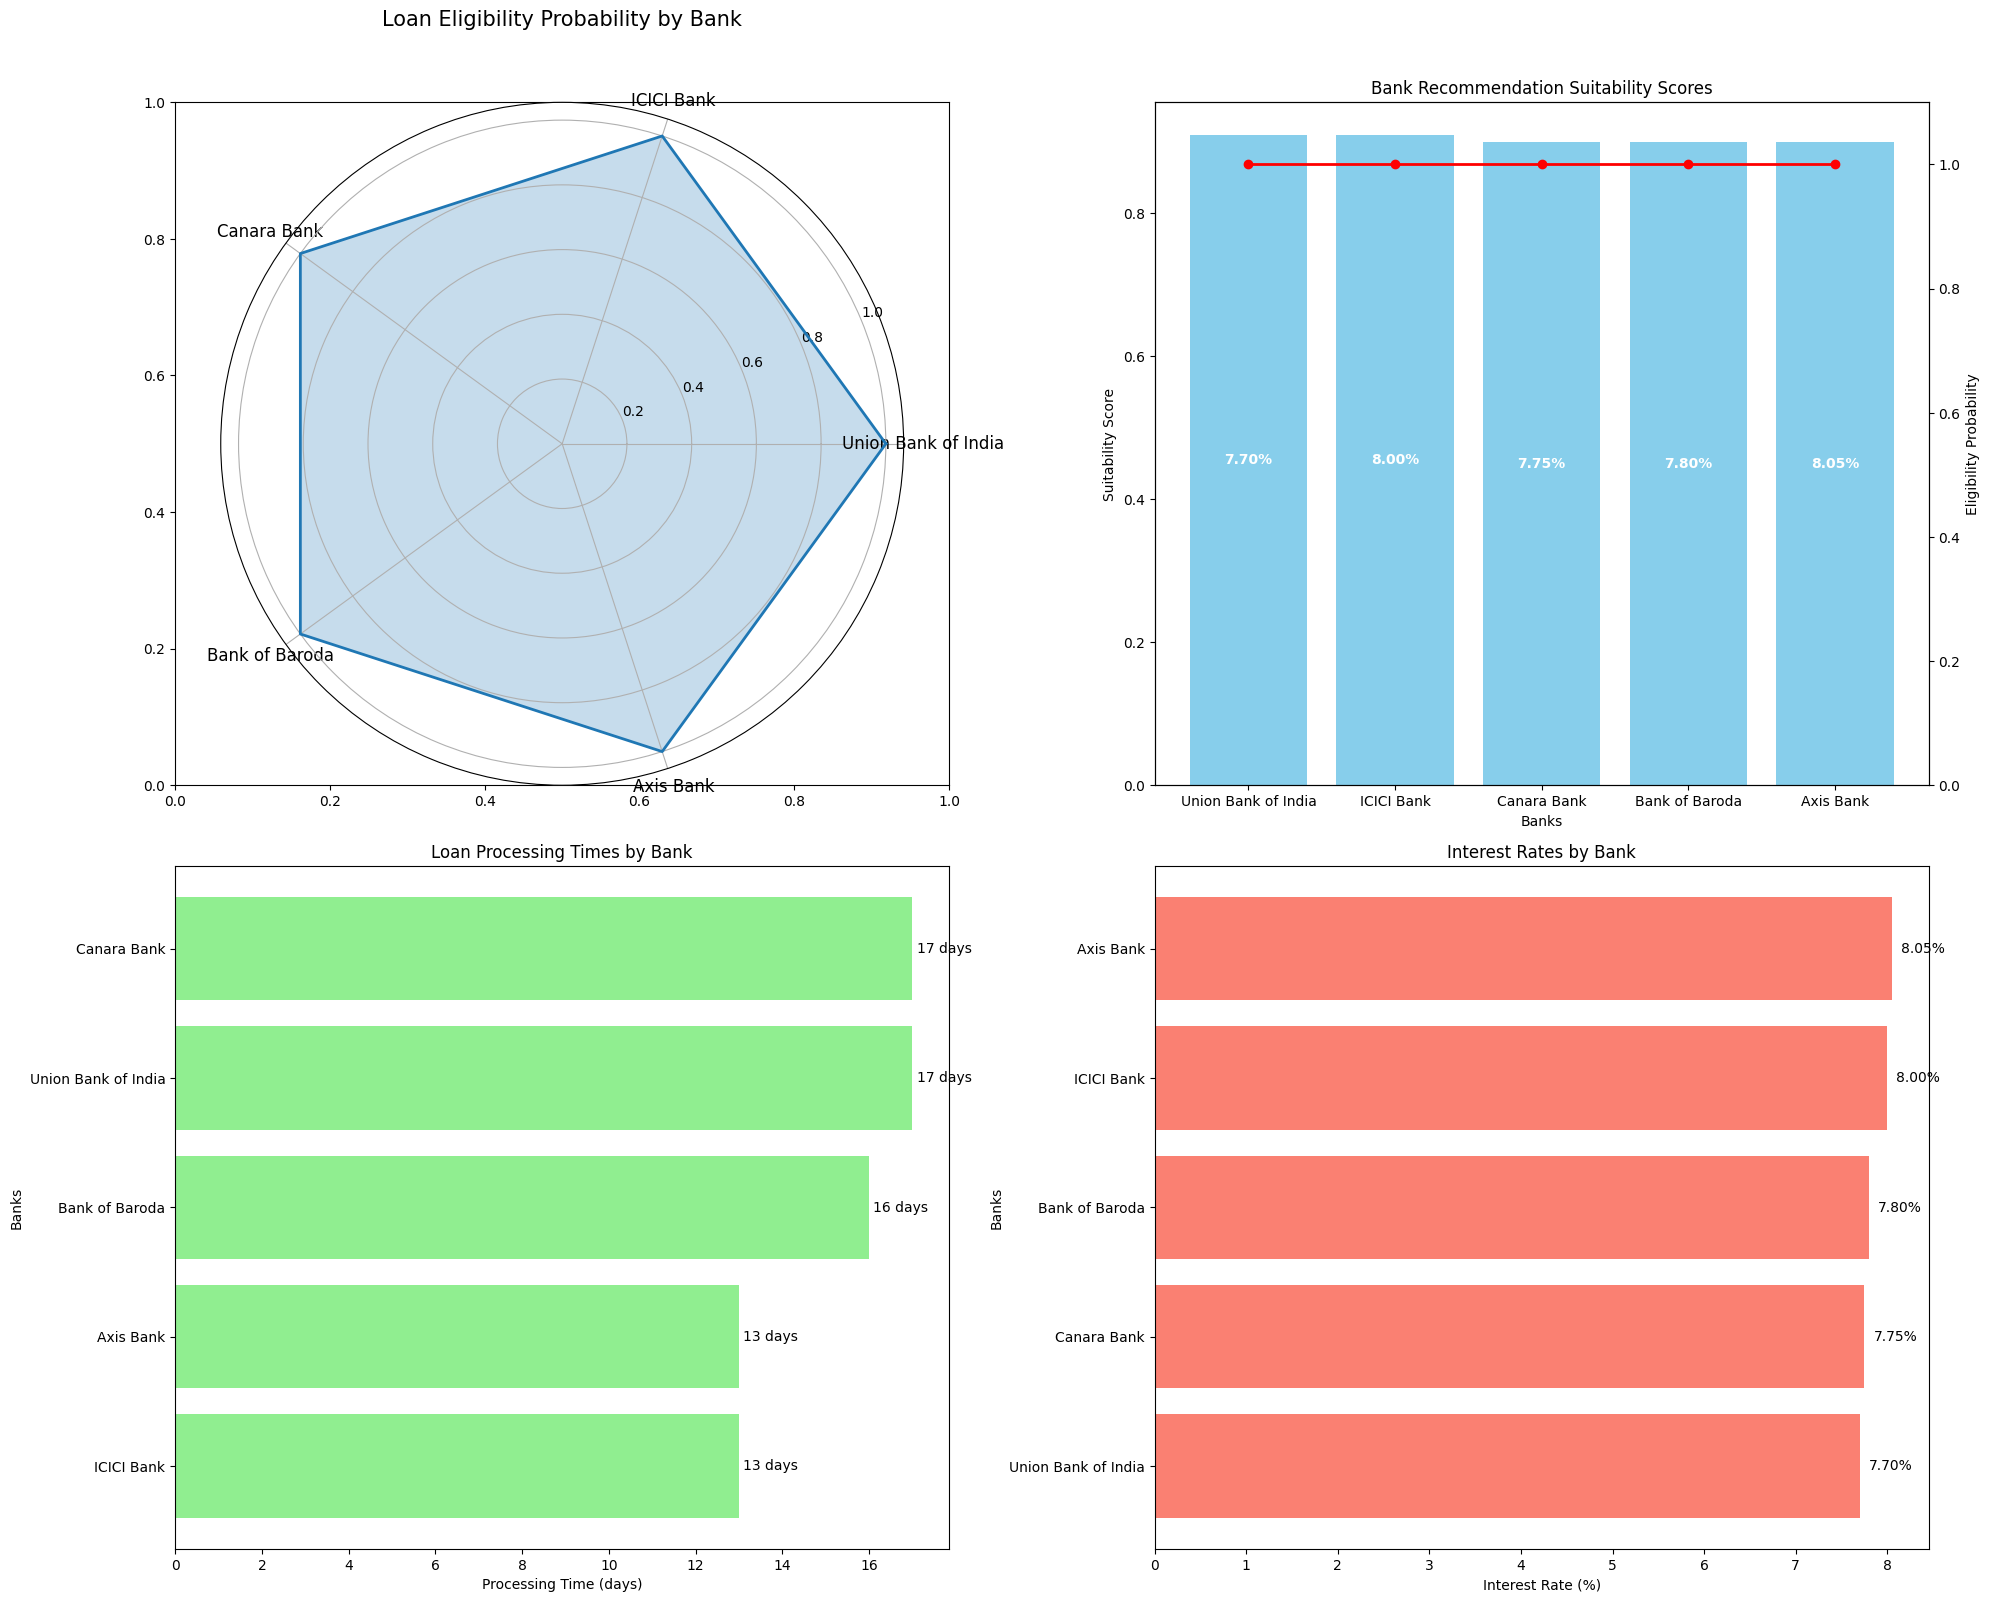

In [ ]:
run_recommendation_system()

### Use Case 2: Fresh Graduate with Job Offer

* Name: Priya Nair
* Age: 23
* Gender: Female
* Marital Status: Single
* Dependents: 0
* Occupation: Salaried-Private (Entry Level)
* Employment Years: 0.5
* Monthly Income: ₹45,000
* Existing Loans: 0
* CIBIL Score: 720 (Limited history)
* Loan Type: Car Loan
* Loan Amount: ₹600,000
* Vehicle Price: ₹750,000

Expected Result: Borderline eligibility with some banks, higher interest rates (10-11%), emphasis on short credit history

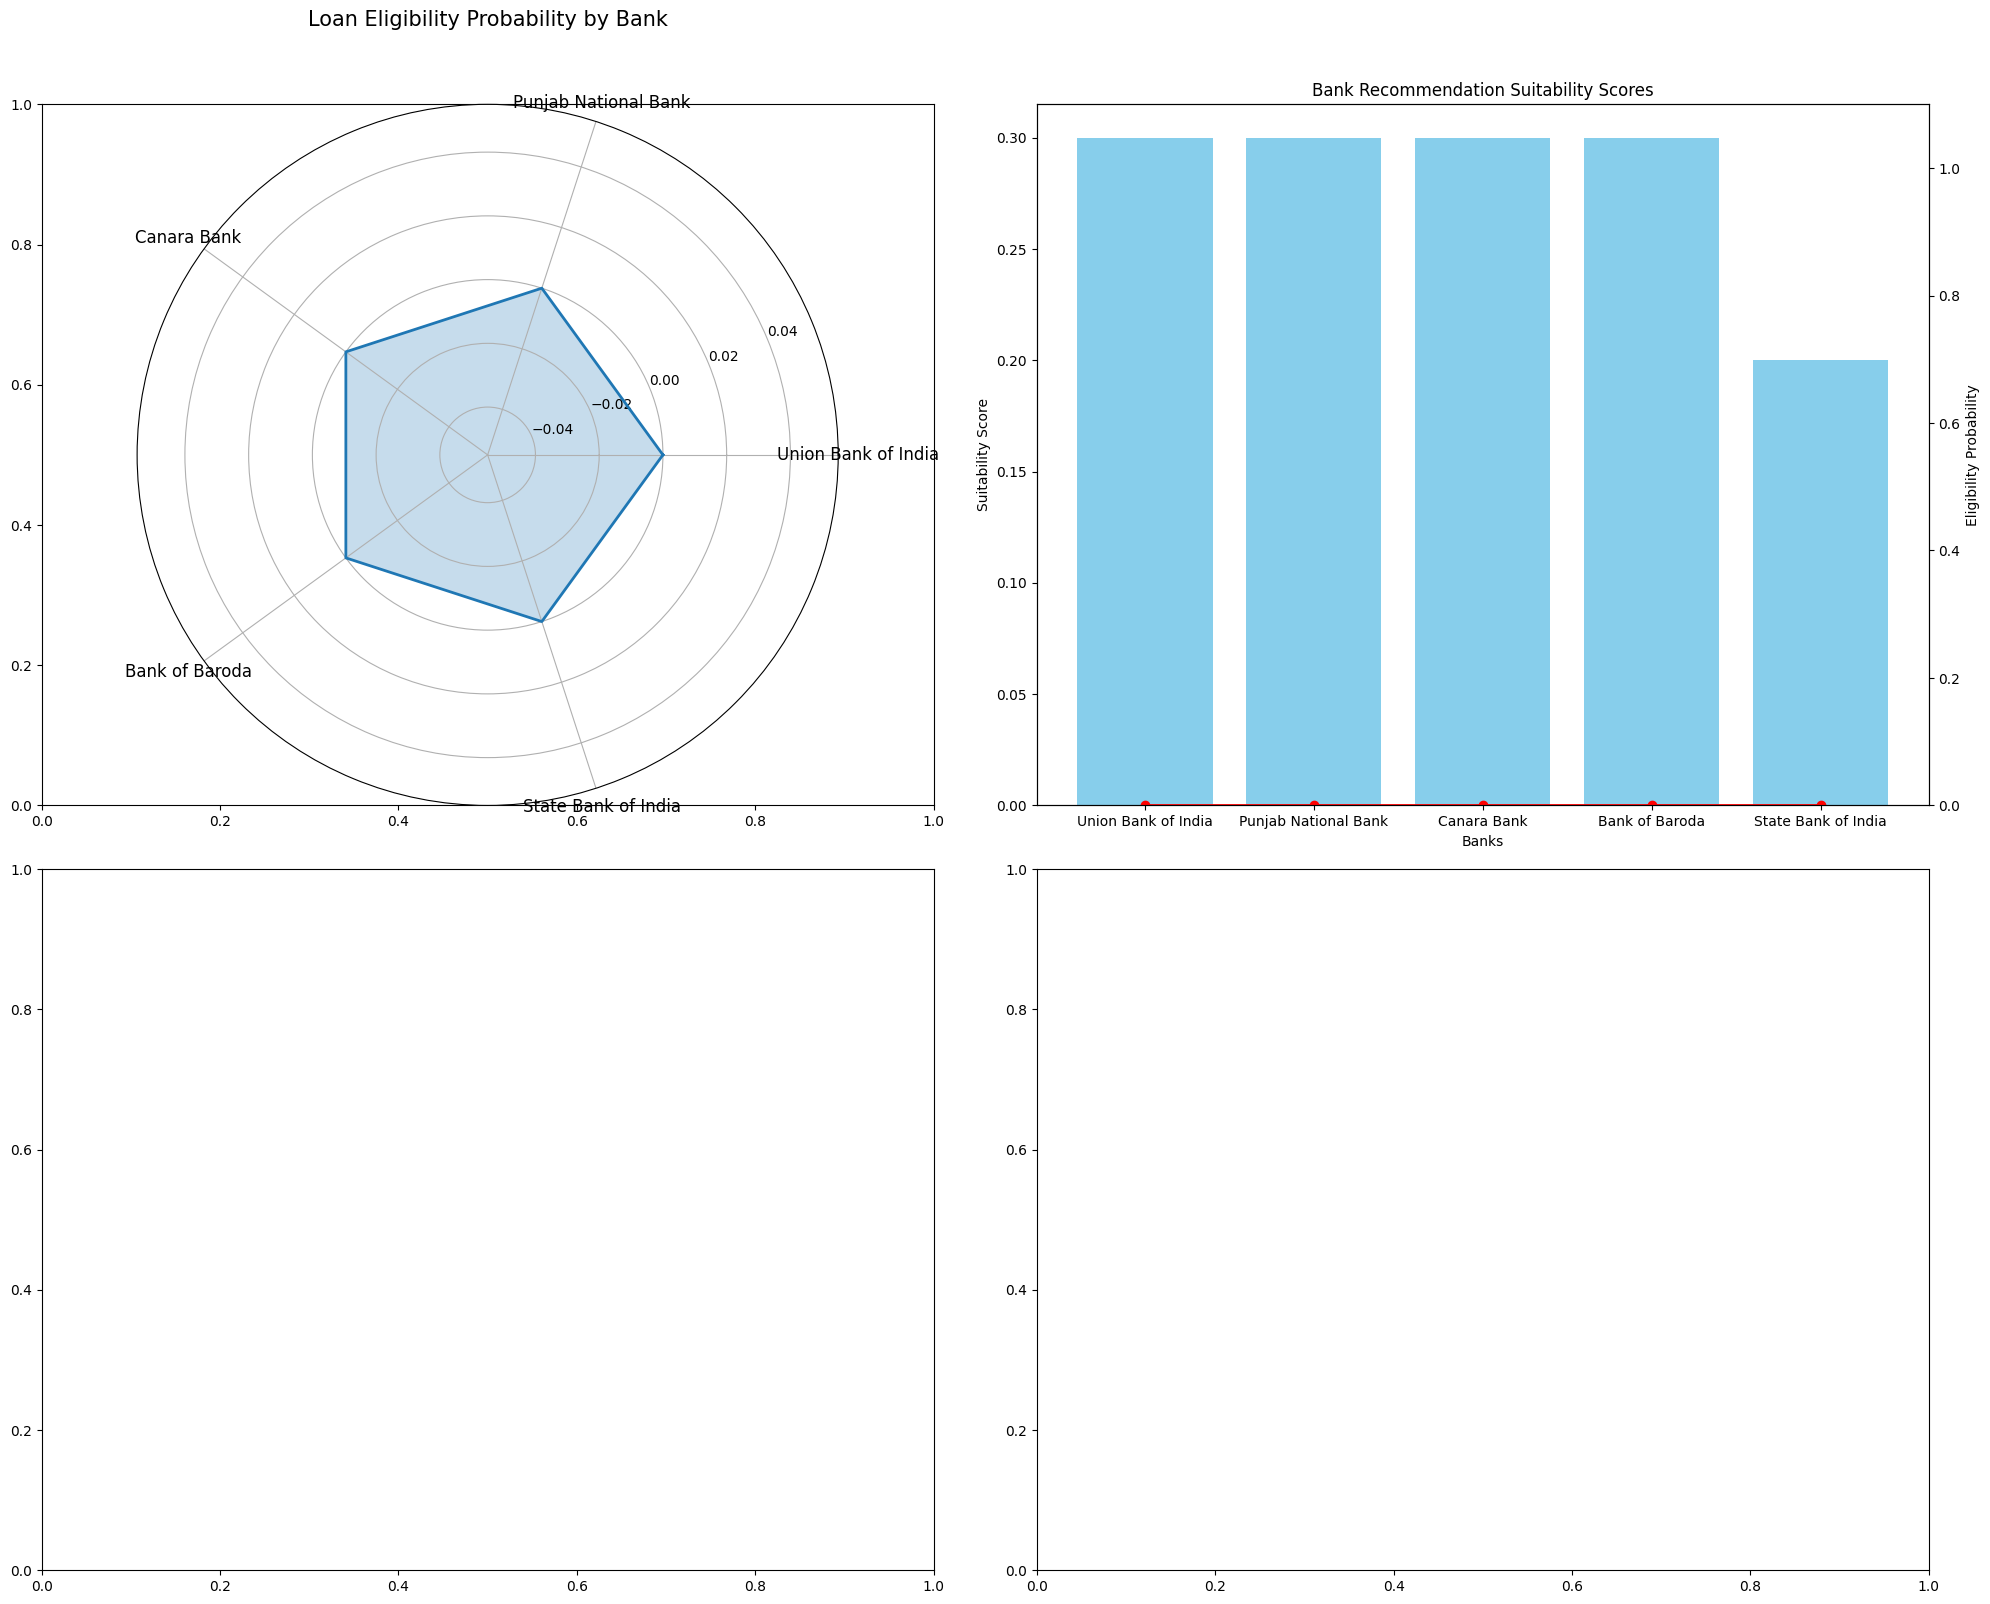

In [ ]:
run_recommendation_system()

### Use Case 3: Self-Employed Professional with Irregular Income

* Name: Vikram Desai
* Age: 38
* Gender: Male
* Marital Status: Married
* Dependents: 1
* Occupation: Self-Employed Professional
* Employment Years: 7
* Monthly Income: ₹90,000 (variable)
* Existing Loans: 1
* Current EMI: ₹15,000
* CIBIL Score: 745
* Loan Type: Personal Loan
* Loan Amount: ₹500,000

Expected Result: Good eligibility but slightly higher interest rates (12-13%) due to self-employment status

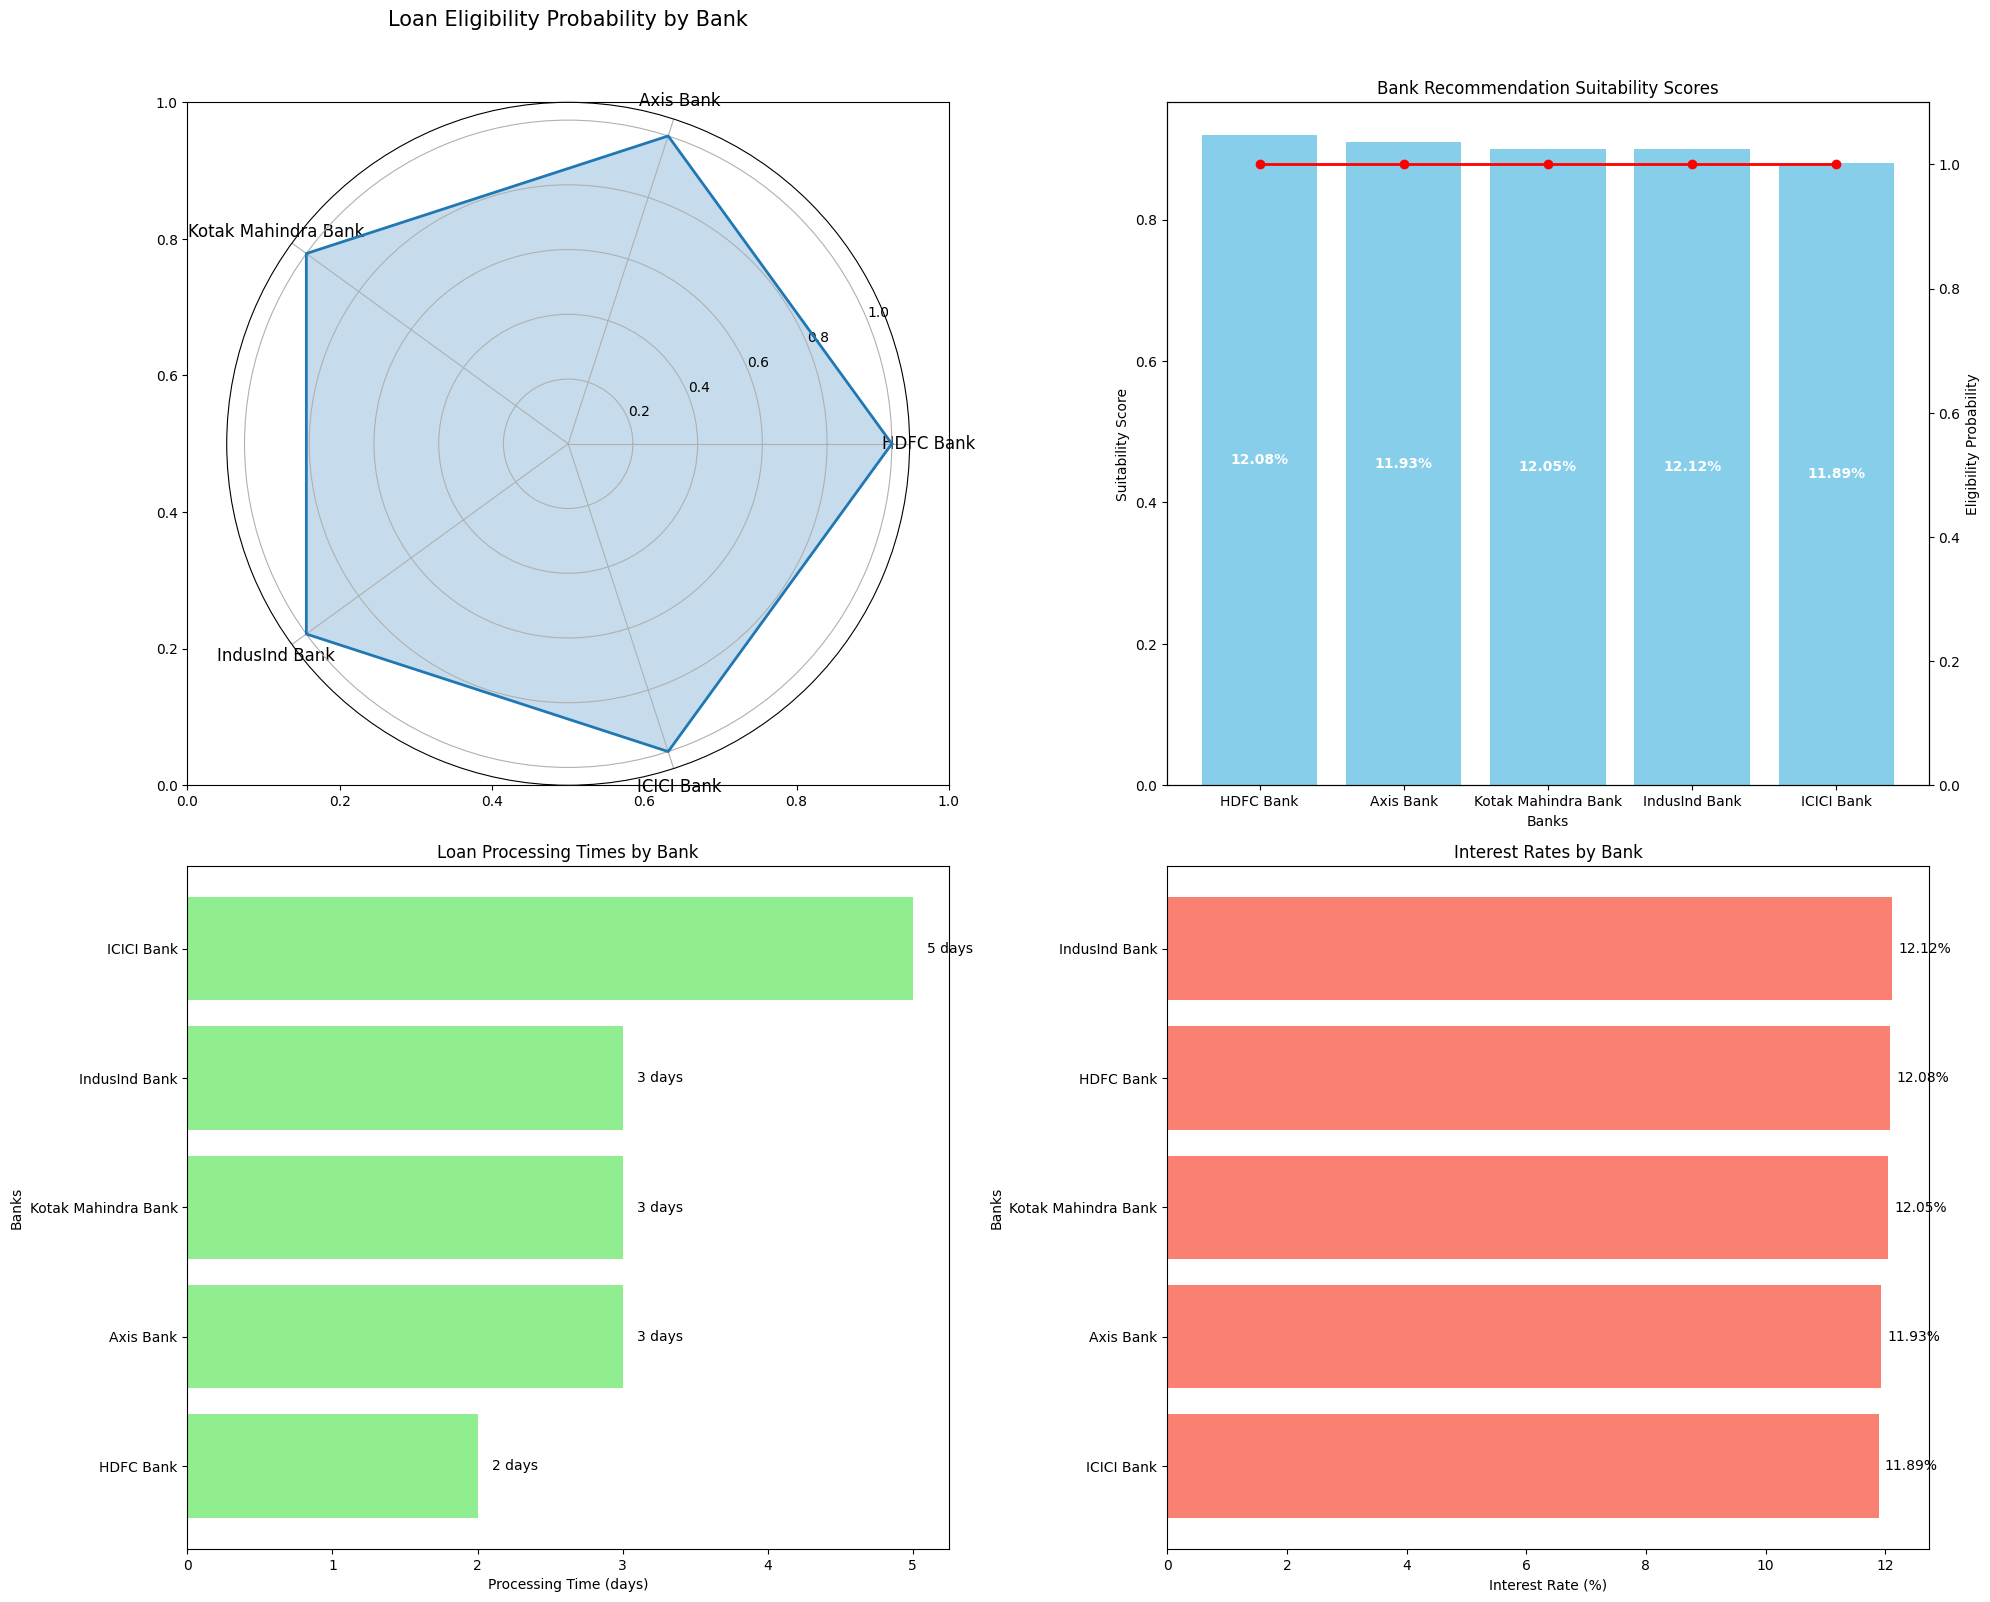

In [ ]:
run_recommendation_system()

### Use Case 4: Retired Individual with Pension

* Name: Suresh Iyer
* Age: 62
* Gender: Male
* Marital Status: Married
* Dependents: 0
* Occupation: Retired
* Monthly Income: ₹55,000 (pension)
* Existing Loans: 0
* CIBIL Score: 790
* Loan Type: Gold Loan
* Loan Amount: ₹400,000
* Gold Weight: 150 grams
* Gold Purity: 22K

Expected Result: Limited eligibility due to age but good terms for gold loan as it's secured

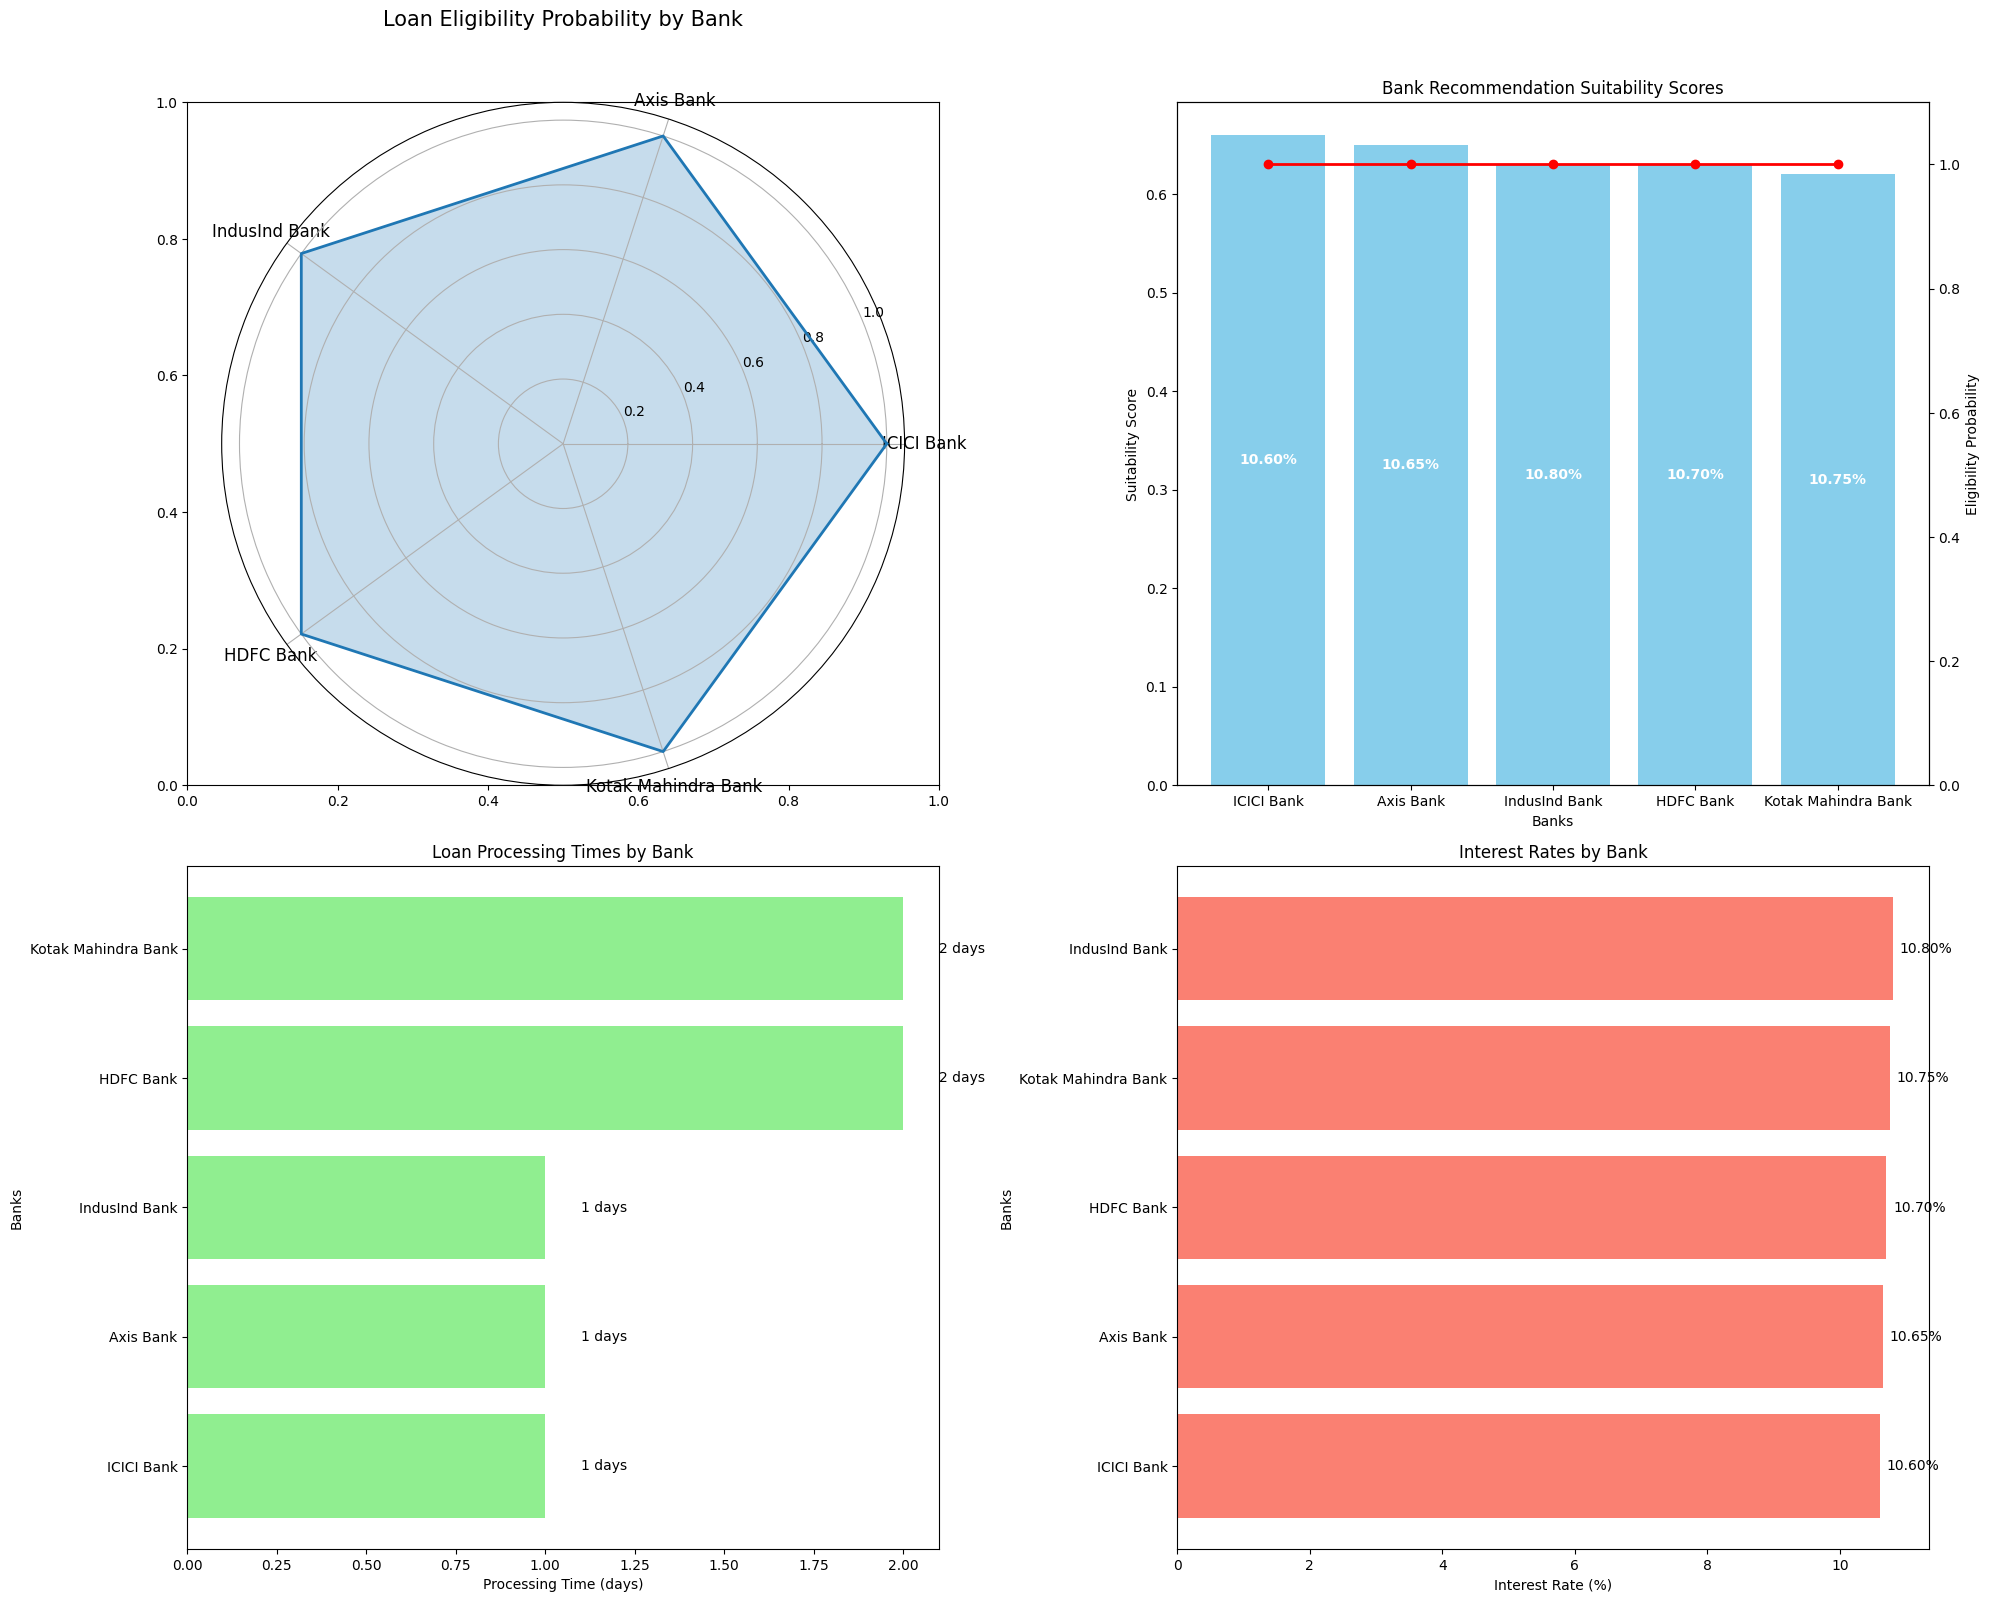

In [ ]:
run_recommendation_system()

### Use Case 5: Eligible Applicant
User Profile:

* Name: Arun Sharma
* Age: 40
* Gender: Male
* Marital Status: Married*
* Dependents: 2
* Occupation: Salaried-Private
* Employment Duration: 8.5 years
* Monthly Income: ₹85,000
* Existing Loans: 1
* Current EMI: ₹12,000
* CIBIL Score: 780
* Credit History: 10 years

Loan Request:

* Loan Type: Home Loan
* Loan Amount: ₹5,000,000
* Loan Tenure: 27
* Property Value: ₹7,000,000
* Property Type: Apartment

Expected Result:
When this profile is submitted in the user interface, the system should:

Calculate high eligibility probabilities (>0.8) for most banks
Show a high suitability score for banks like HDFC Bank, SBI, and ICICI Bank
Display favorable interest rates (around 8-8.5%)
Recommend 5 banks with detailed explanations
Visualizations should show this applicant has multiple good options

The top recommendation would likely be HDFC Bank or SBI, with the interface

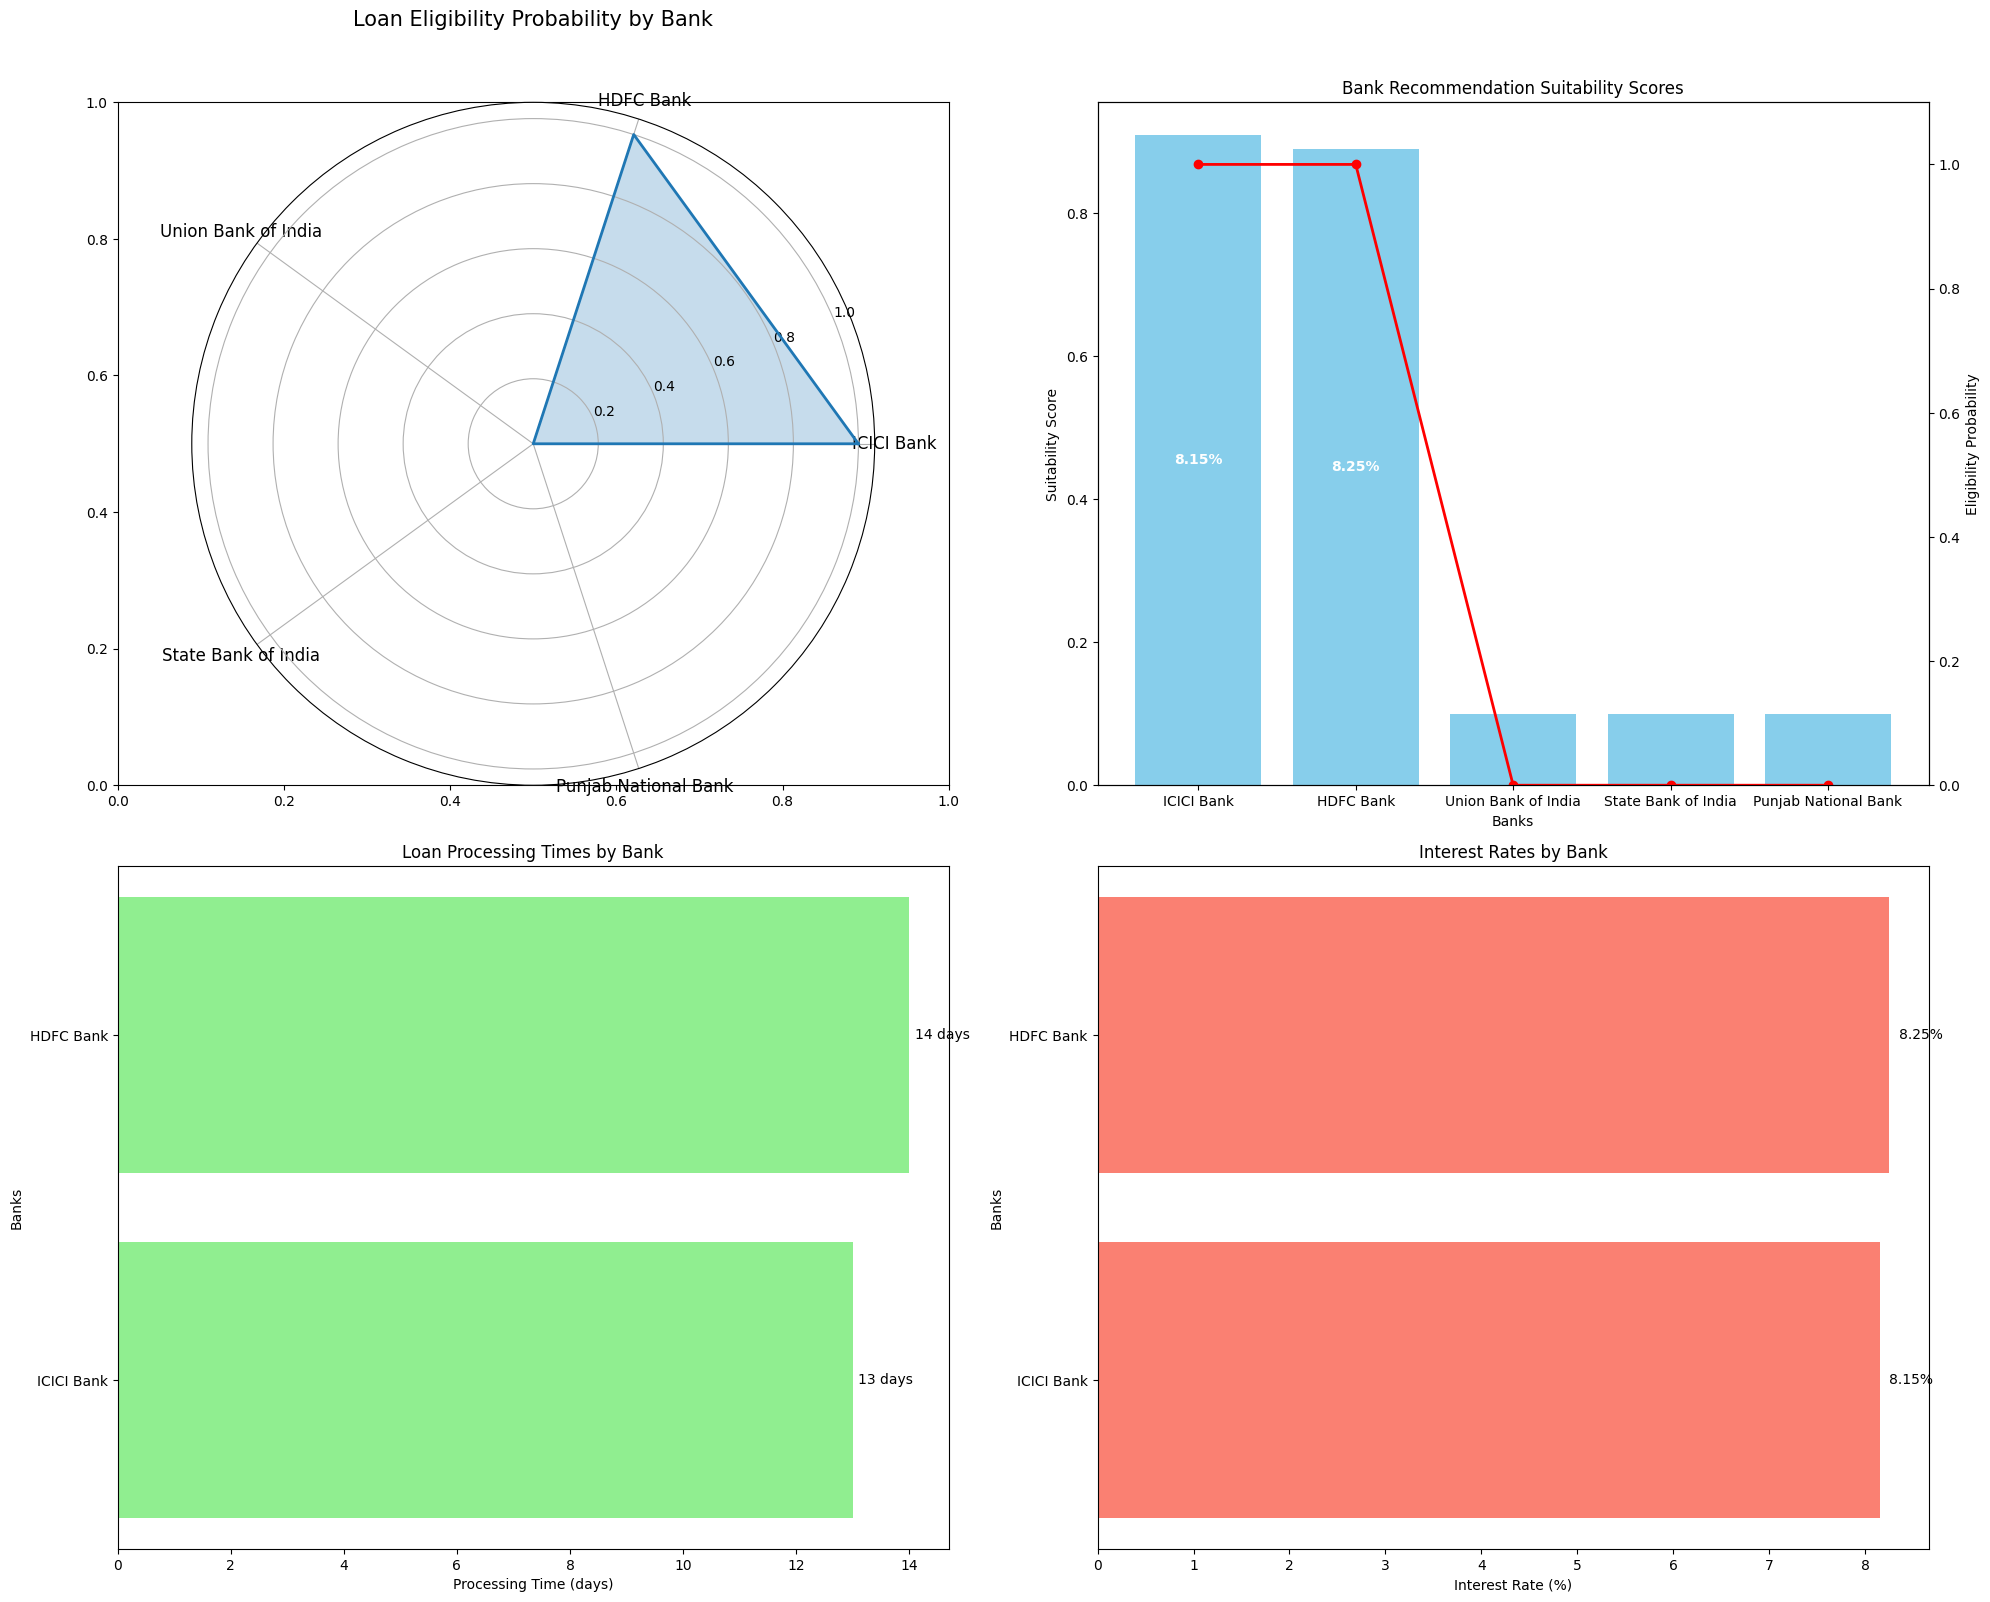

In [ ]:
run_recommendation_system()

In [ ]:
run_recommendation_system()

NameError: name 'run_recommendation_system' is not defined

### Use Case 6: Mid-career Professional with Moderate Credit
Profile Details:

* Name: Rahul Mehta
* Age: 38
* Gender: Male
* Marital Status: Married
* Dependents: 2
* Occupation: Salaried-Private (Middle Management)
* Employment Years: 4.5
* Monthly Income: ₹65,000
* Existing Loans: 2
* Current EMI: ₹18,000
* CIBIL Score: 680
* Credit History Years: 8
* Loan Type: Home Loan
* Loan Amount: ₹4,000,000
* Property Value: ₹5,500,000
* Property Type: Apartment

What to expect:
When you enter this profile, you should see varying eligibility and suitability scores:

Public sector banks like SBI and Punjab National Bank should show good eligibility because:

They tend to be more lenient with CIBIL scores in the 650-700 range
Their DTI ratio requirements are often more flexible (his DTI is 27.7%)
They often focus more on employment stability than private banks


Private banks like HDFC and ICICI will likely show moderate eligibility because:

They typically prefer CIBIL scores above 700 for the best rates
His loan-to-value ratio (72.7%) is good but not excellent
They may be more stringent about the debt-to-income ratio


Banks like IndusInd might show poorer eligibility because:

They tend to prefer higher-income customers for home loans
His moderate credit score (680) falls below their preferred threshold

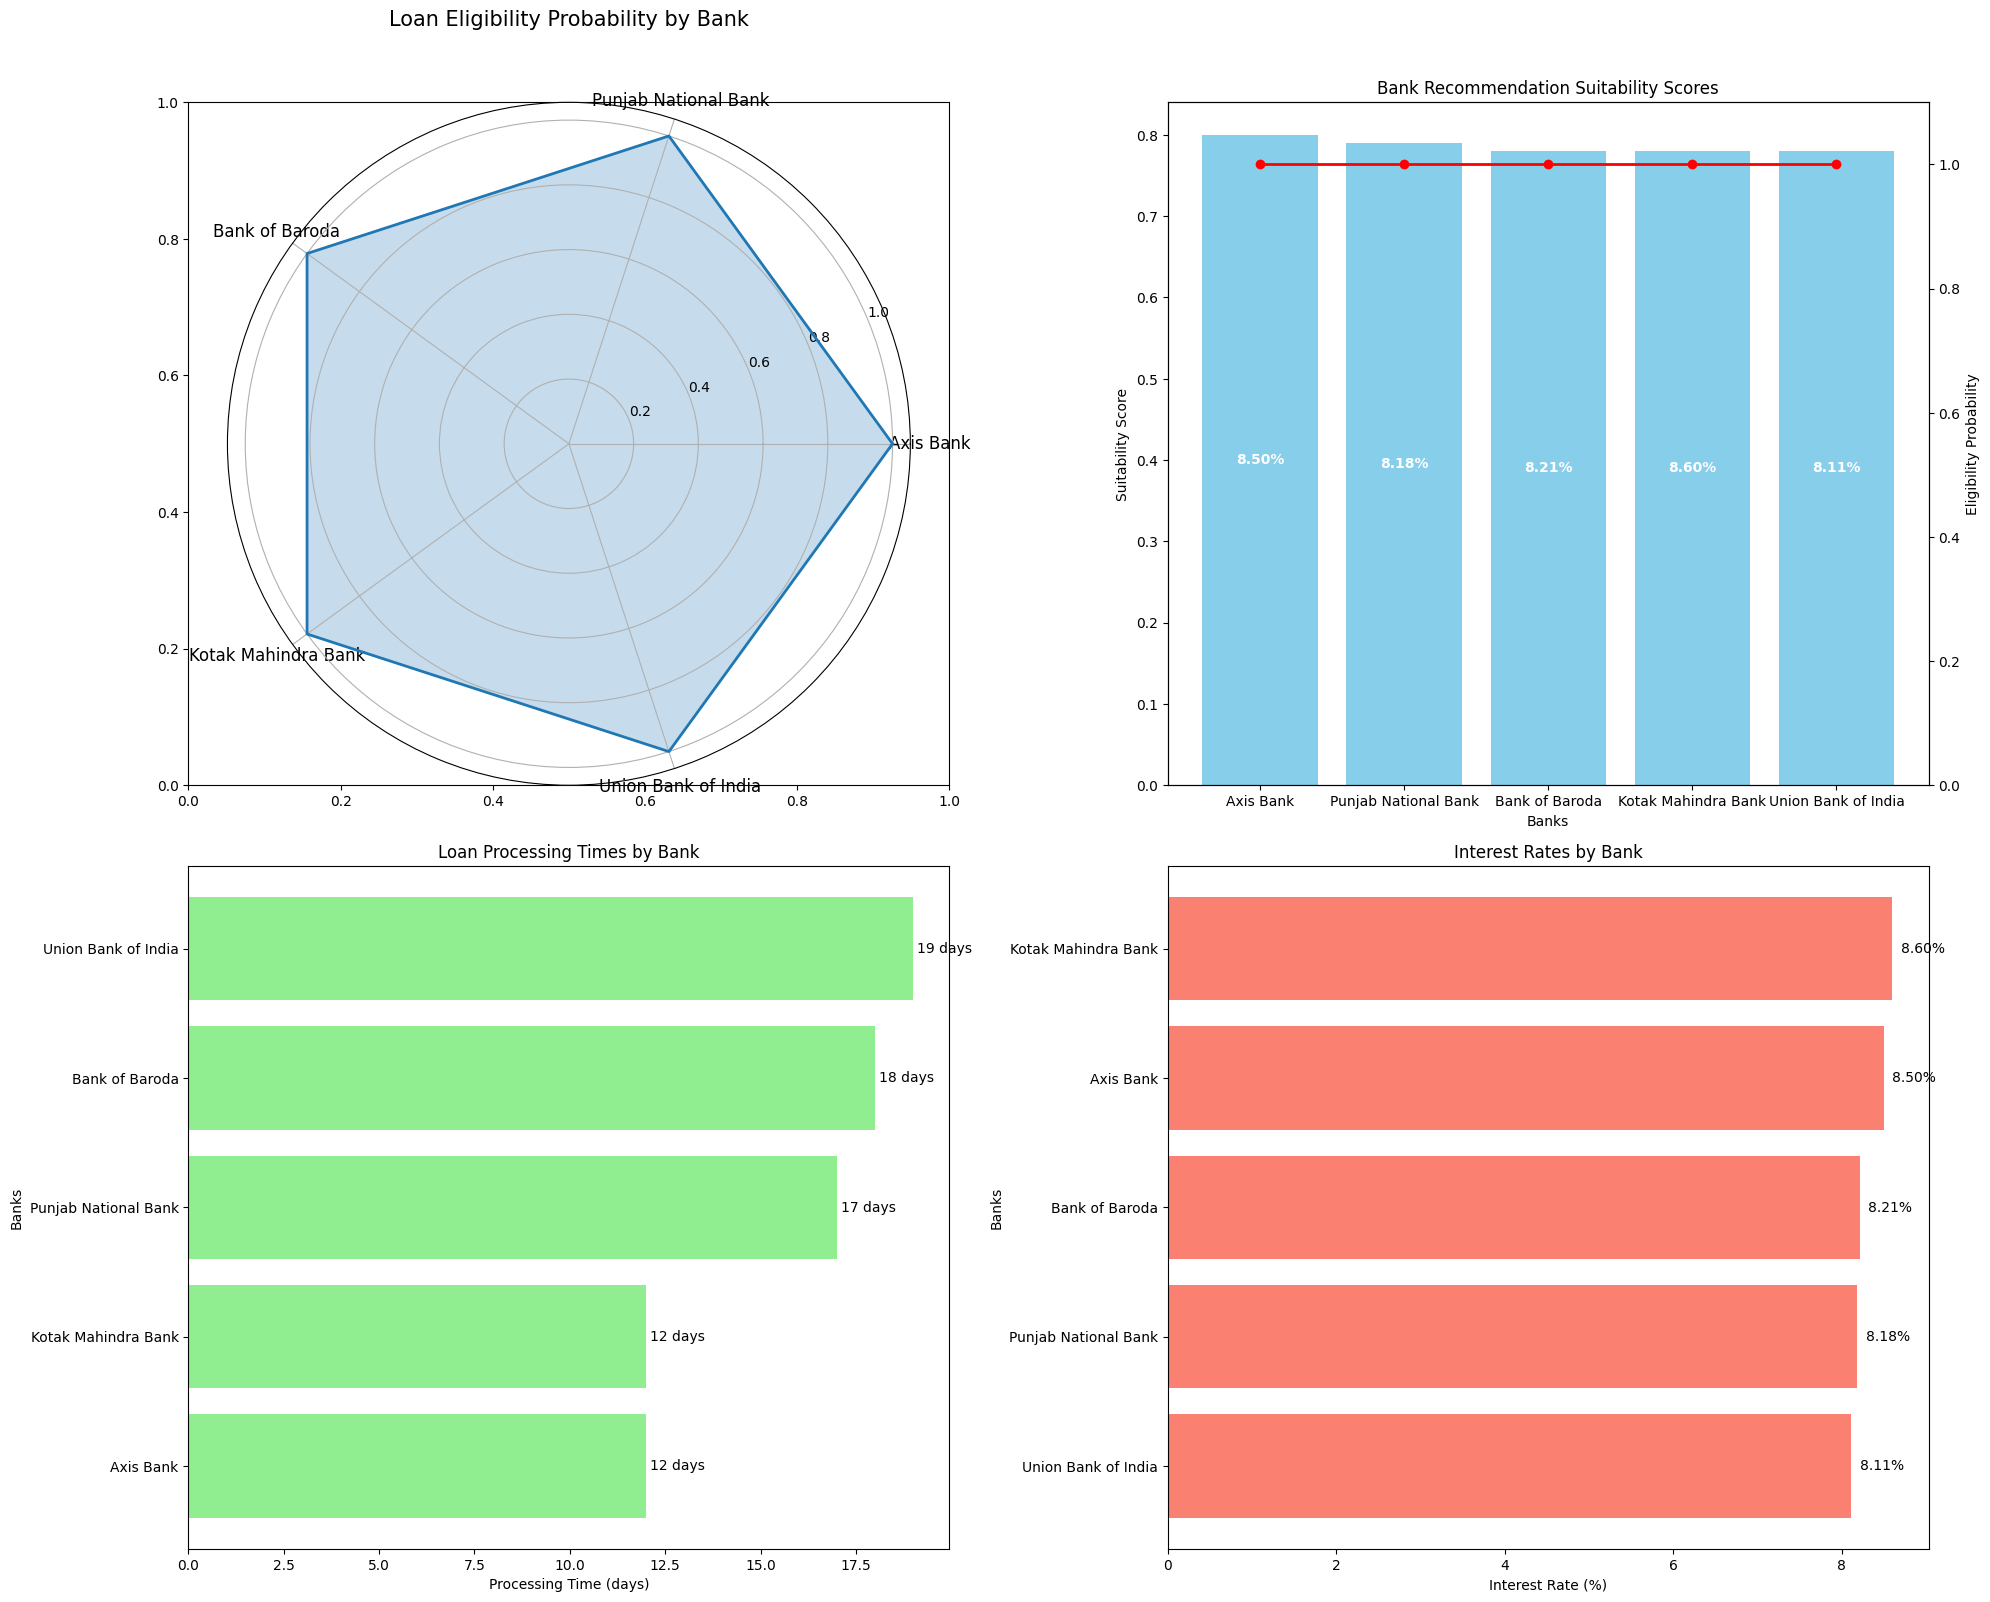

In [ ]:
run_recommendation_system()

### Use Case 6
    'name': 'Sunita Patel',
    'age': 38,
    'gender': 'Female',
    'marital_status': 'Married',
    'dependents': 1,
    'occupation': 'Self-Employed Professional',
    'employment_years': 5,
    'monthly_income': 65000,
    'annual_income': 780000,
    'existing_loans': 1,
    'current_emi': 10000,
    'cibil_score': 640,
    'credit_history_years': 8,
    'loan_type': 'Car',
    'loan_amount_requested': 800000,
    'vehicle_price': 1000000,
    'vehicle_make': 'Hyundai'

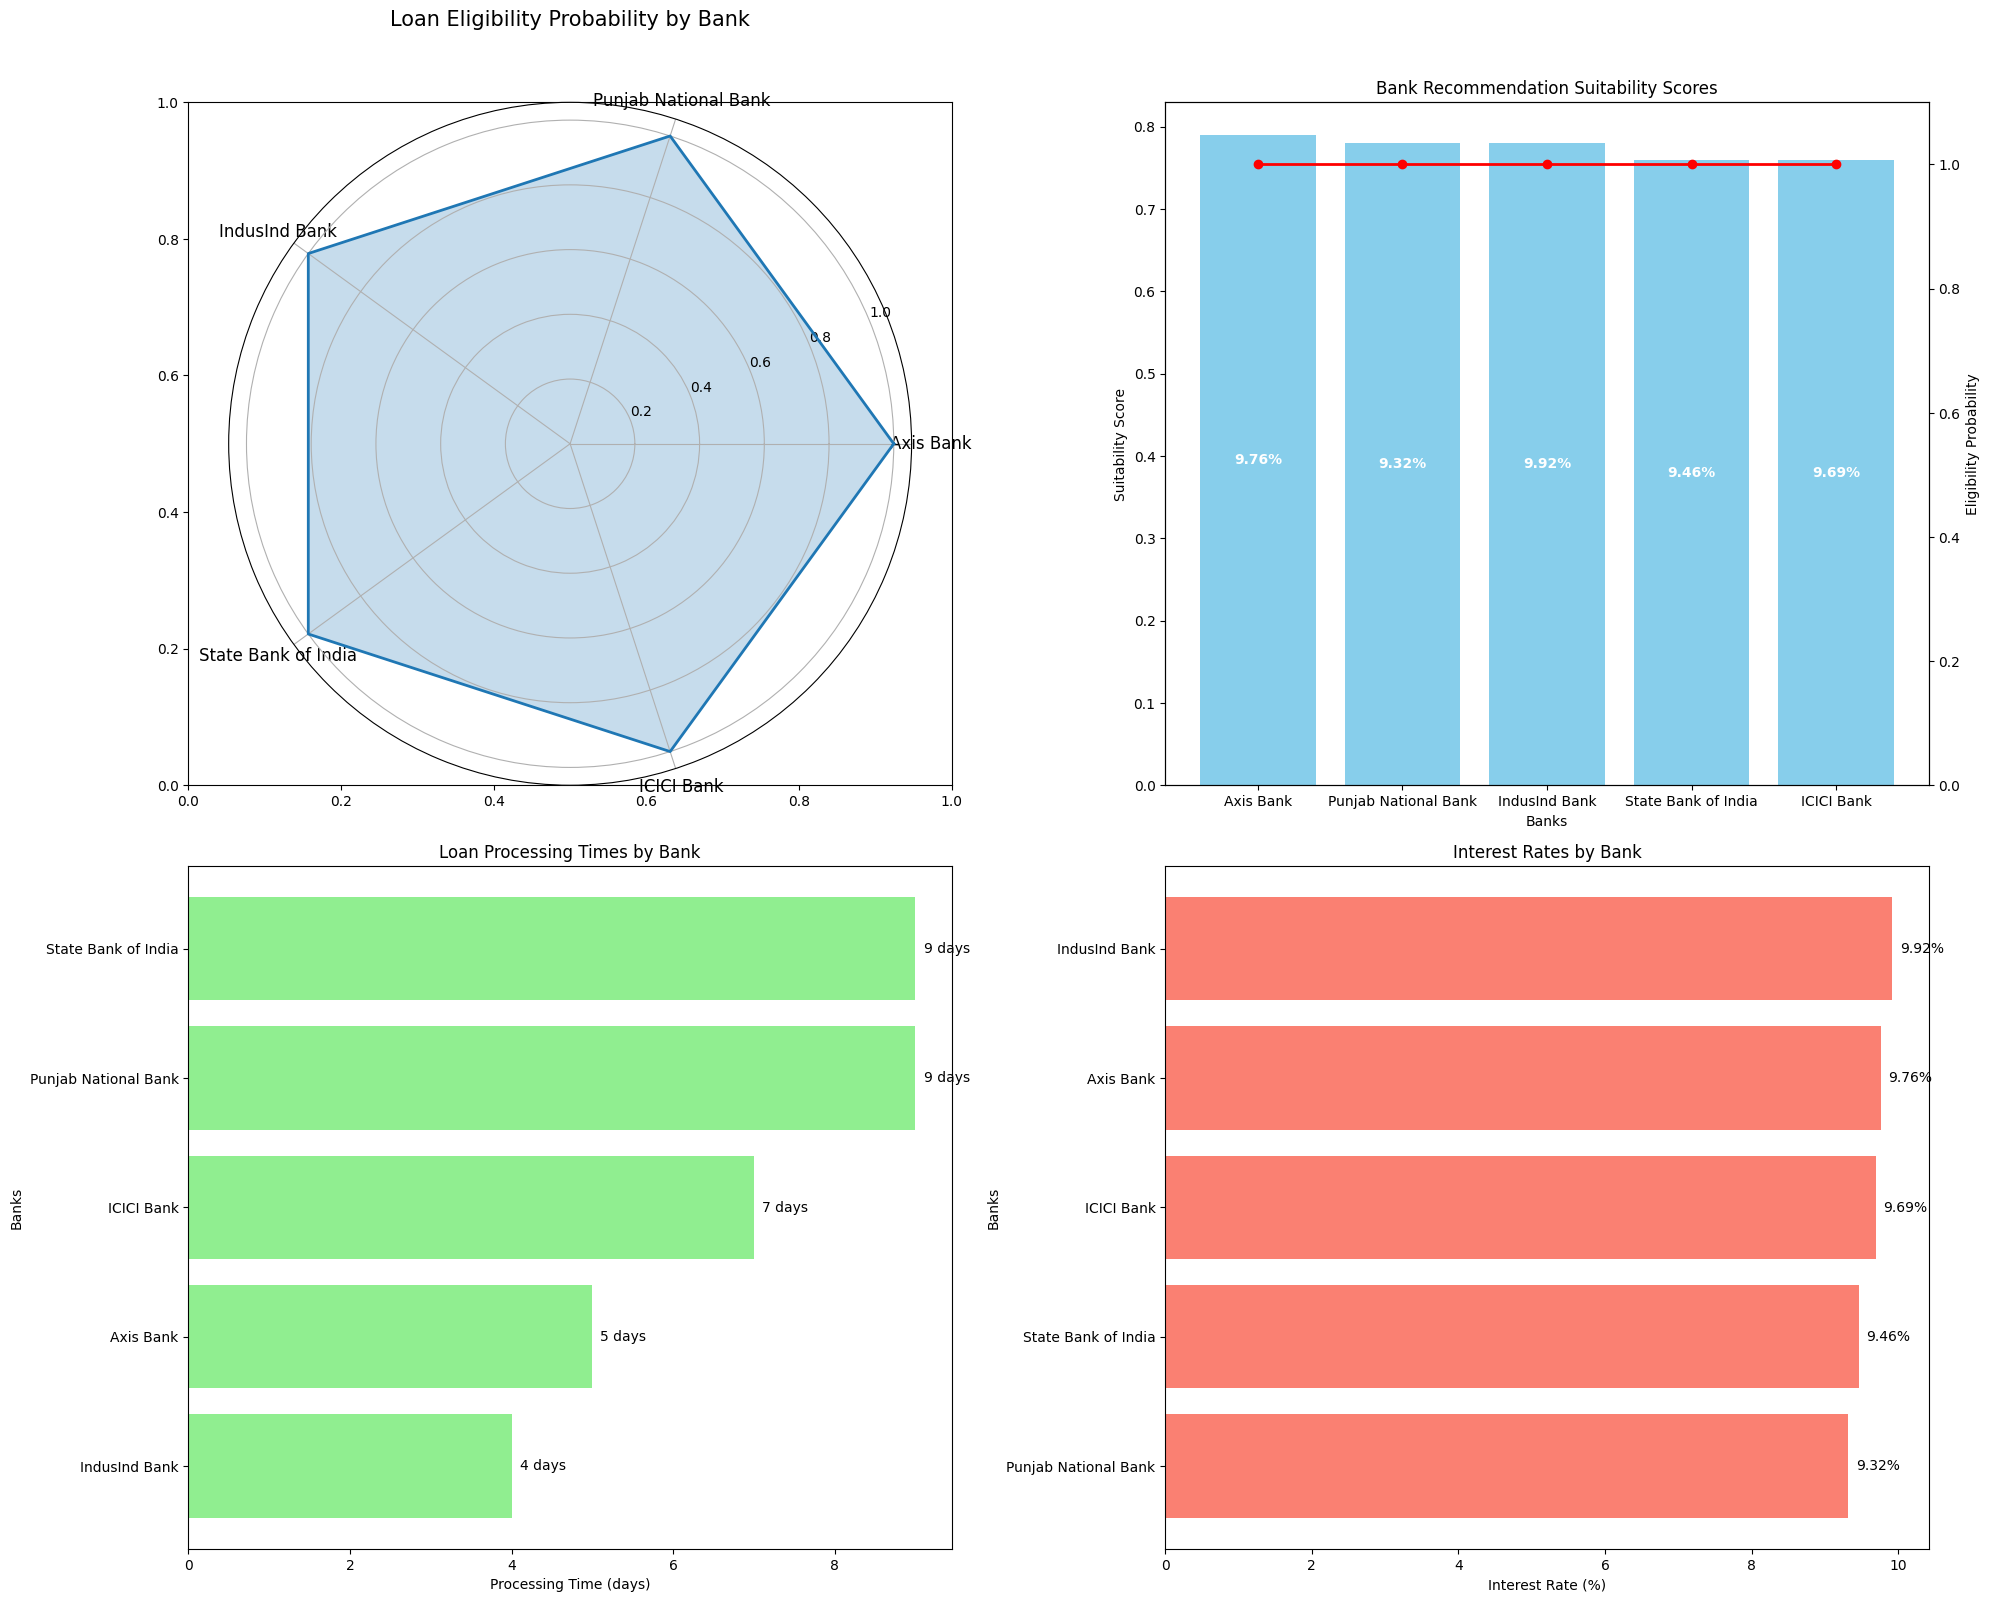

In [ ]:
run_recommendation_system()

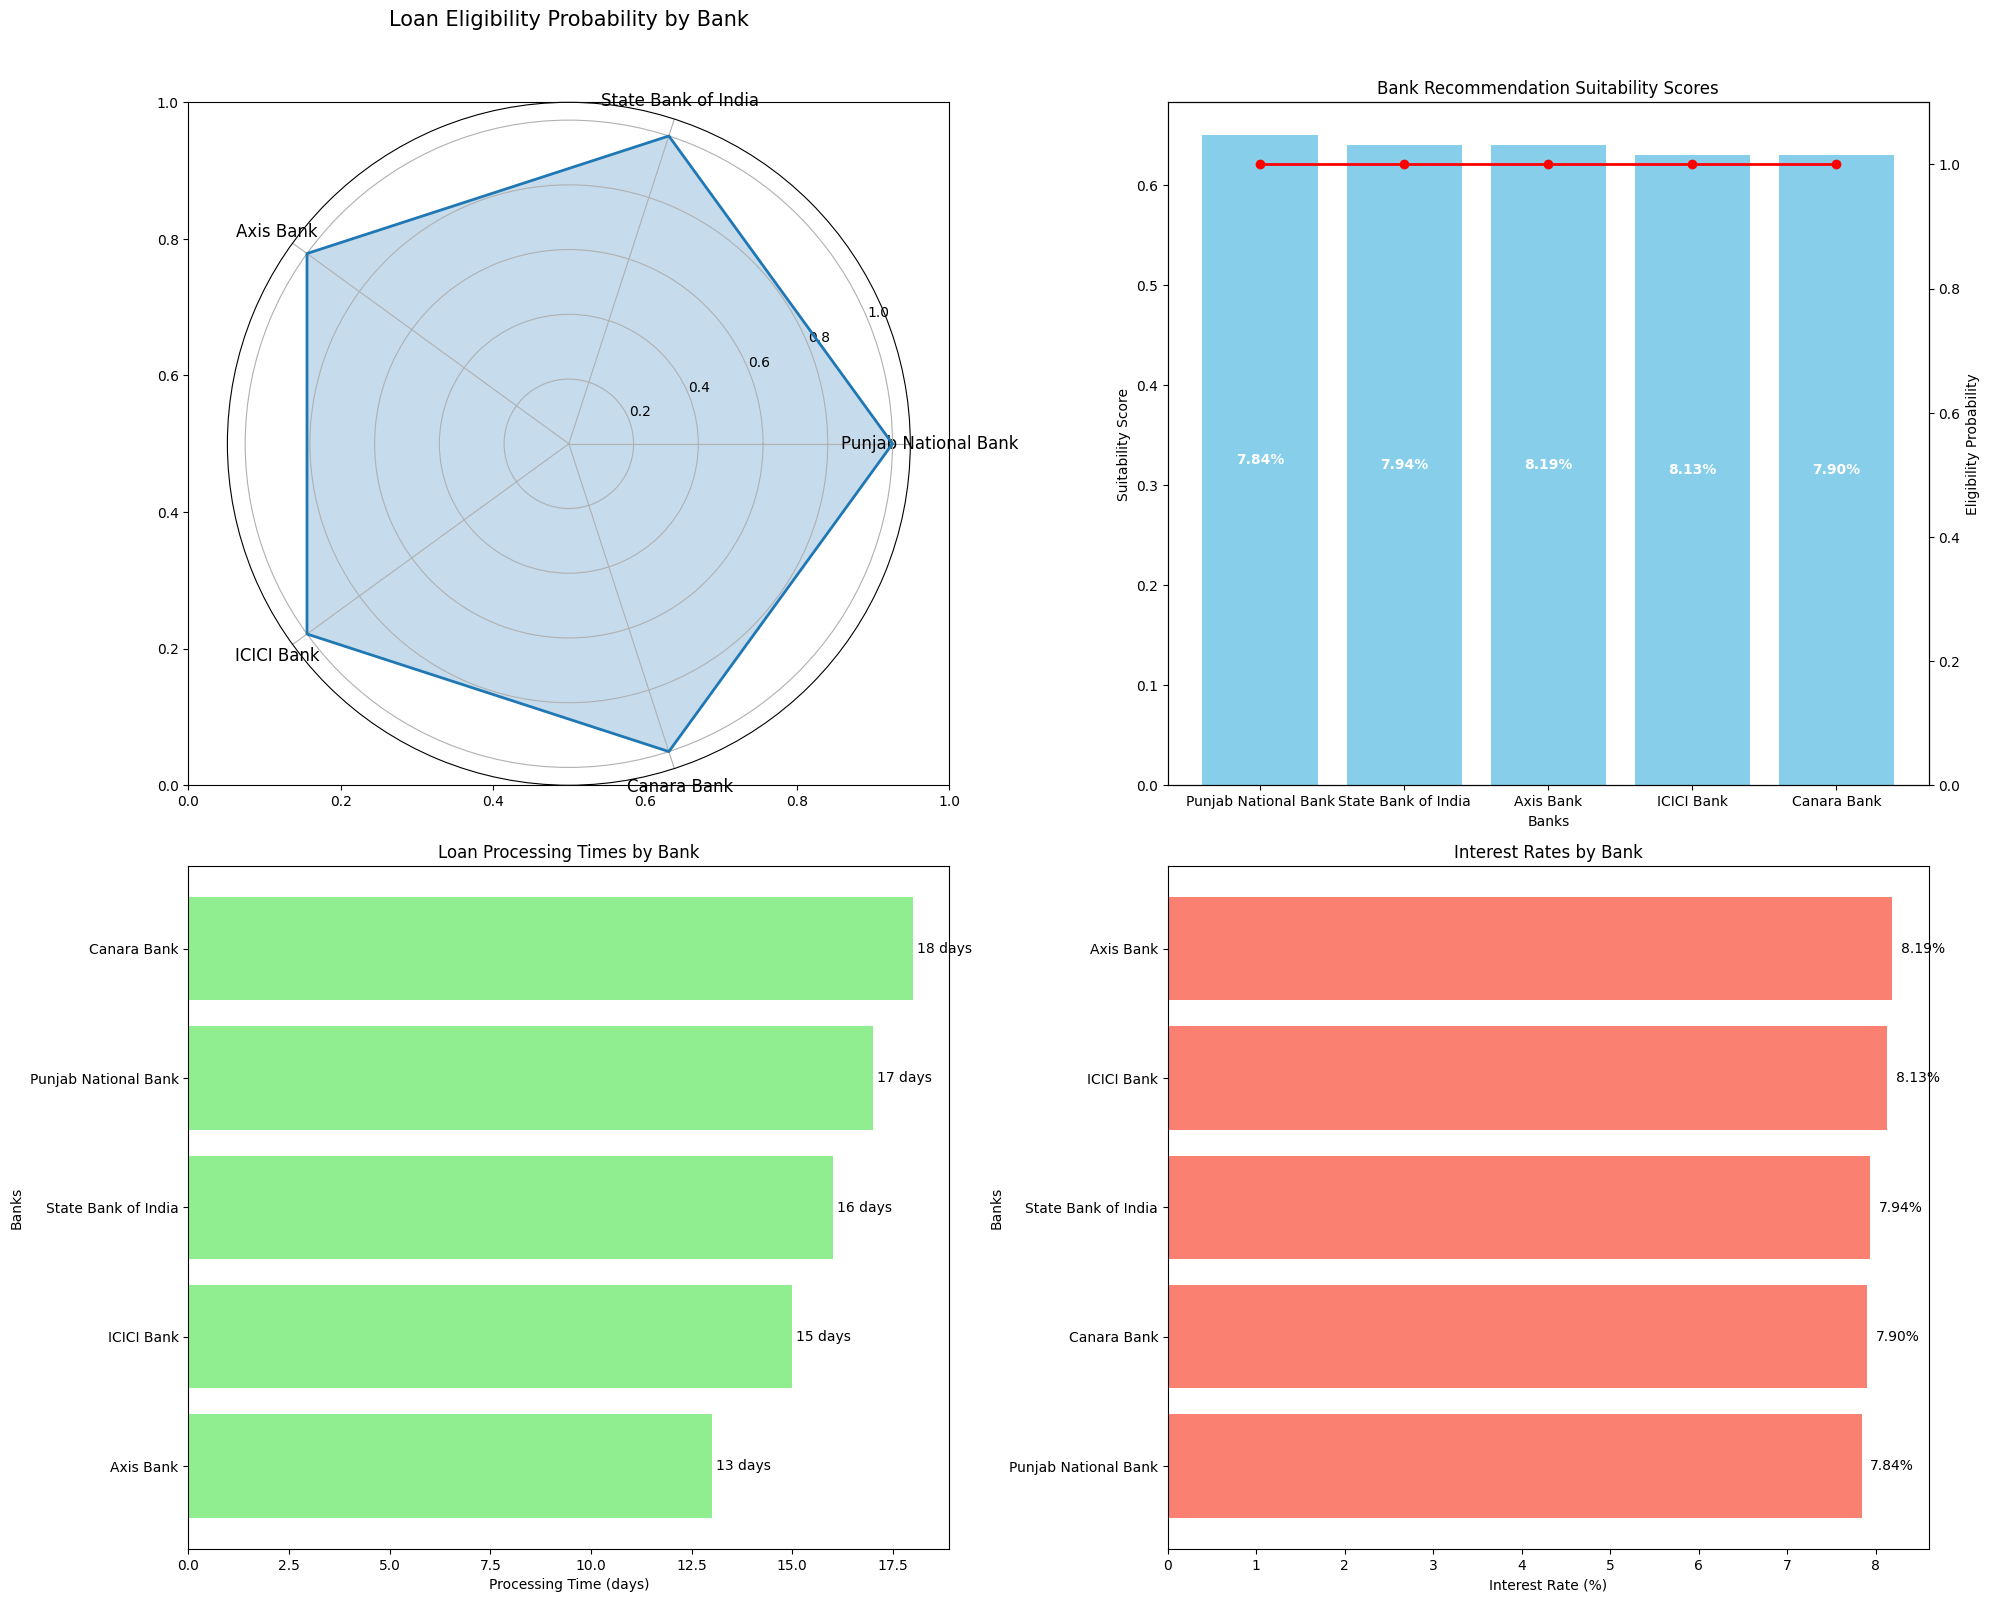

In [ ]:
run_recommendation_system()

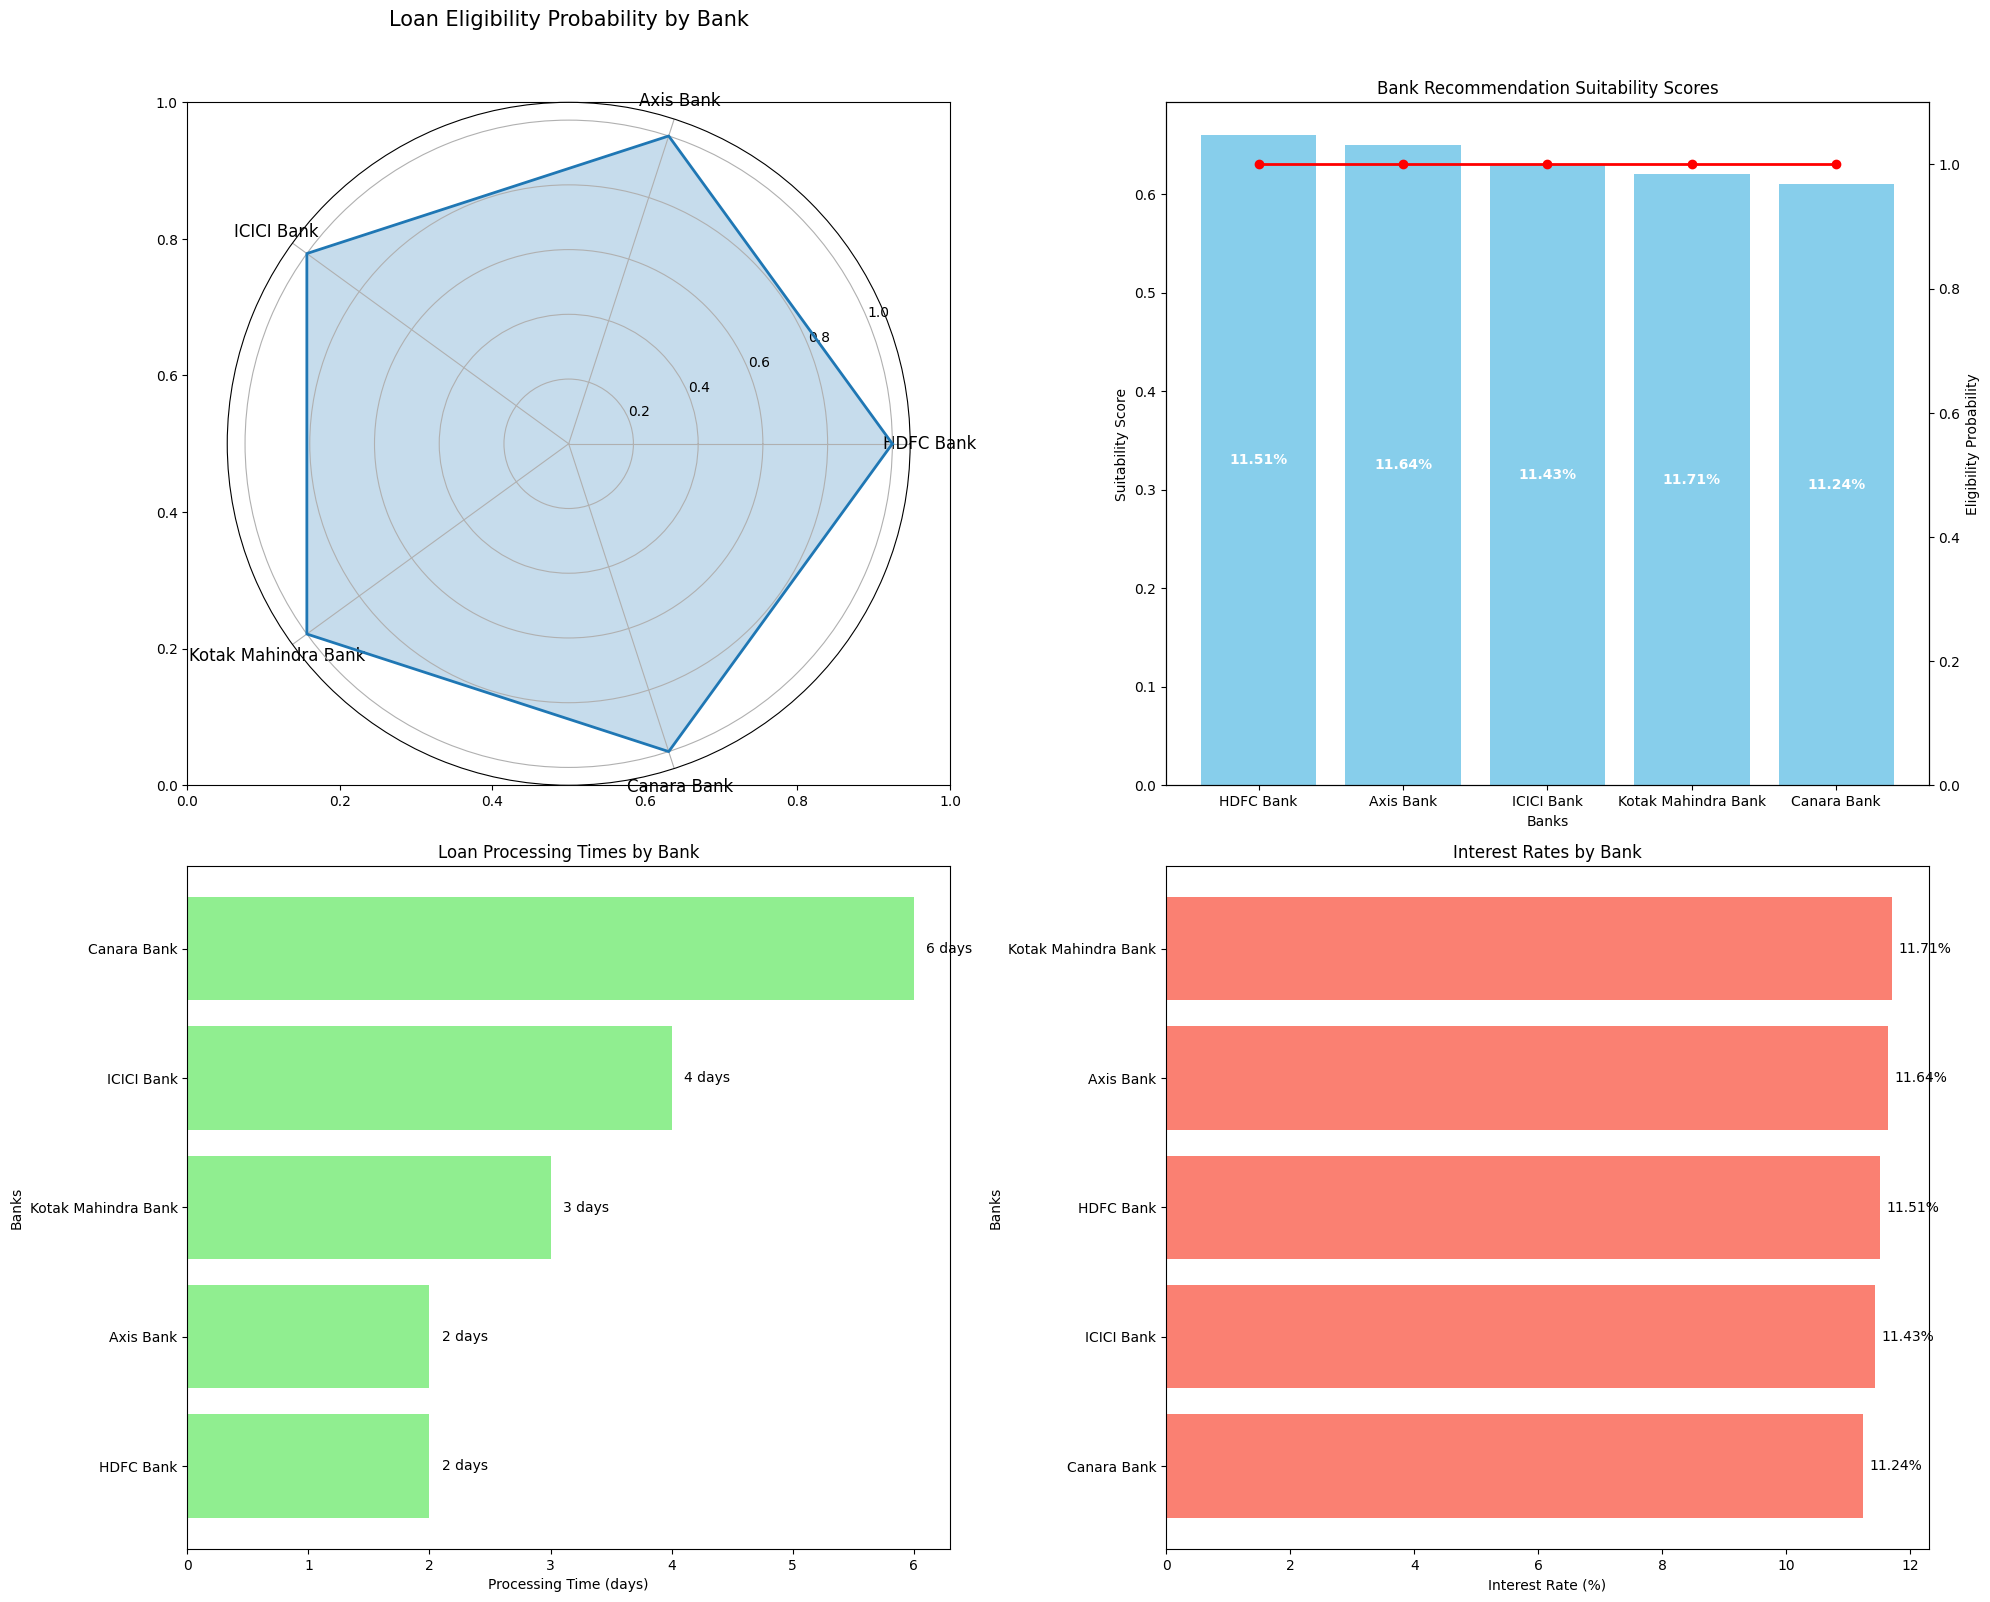

In [ ]:
run_recommendation_system()
